In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

# 恢复默认设置
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update(
    {
        'font.serif': ['Times New Roman'],
        'font.sans-serif': ['SimHei'],
        'axes.unicode_minus': False,
    }
)

if not os.path.exists("./data/processed_data_q2.csv"):
    print("no data found, loading raw data...")
    data = pd.read_csv("./data/processed_data.csv")
    data["最大磁通密度"] = data.iloc[:, 4:-2].apply(lambda x: x.max(), axis=1)
    data.to_csv("./data/processed_data_q2.csv", index=False)
else:
    print("loading data...")
    data = pd.read_csv("./data/processed_data_q2.csv")

data.head()

loading data...


温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1017      1018      1019      1020      1021  \
0  0.000919  0.001096  ... -0.001022 -0.000846 -0.000669 -0.000492 -0.000316   
1  0.000221  0.000413  ... -0.001899 -0.001707 -0.001515 -0.001322 -0.001129   
2 -0.002919 -0.002704  ... -0.005285 -0.005070 -0.004855 -0.004640 -0.004425   
3  0.000466  0.000711  ... -0.002220 -0.001976 -0.001732 -0.001488 -0.001244   
4  0.001555  0.001830  ... -0.001466 -0.001192 -0.000917 -0.000642 -0.000367   

       1022      1023  磁芯材料  0（磁通密度，T）    最大磁通密度  
0 -0.000140  0.000036   材料1        NaN  0.028849  
1 -0.000937 -0.000744   材料1        NaN  0.031419  
2 -0.004210 -0.003995   材料1        NaN  0.035535  
3 -0.001000 -0.000756   材料1        NaN  0.040015  
4 -0.000092  0.000183   材料1        NaN  0.045028  

[5 rows x 1031 columns]

In [520]:
feature_selected = ["温度，oC", "磁芯材料", "励磁波形", "磁芯损耗，w/m3", "频率，Hz", "最大磁通密度"]
data = data[feature_selected]
data.columns = ["温度", "磁芯材料", "励磁波形", "磁芯损耗", "频率", "最大磁通密度"]

# 编码分类变量
# label_encoders = {}
# for column in ["磁芯材料", "励磁波形"]:
#     le = LabelEncoder()
#     data[column] = le.fit_transform(data[column])
#     label_encoders[column] = le

map_dict = {
    "磁芯材料": {"材料1": 1, "材料2": 2, "材料3": 3, "材料4": 4},
    "励磁波形": {"正弦波": 1, "三角波": 2, "梯形波": 3},
}

for column, mapping in map_dict.items():
    data[column] = data[column].map(mapping)

data.head()

温度  磁芯材料  励磁波形         磁芯损耗     频率    最大磁通密度
0  25     1     1  1997.955250  50030  0.028849
1  25     1     1  2427.749830  50020  0.031419
2  25     1     1  3332.725760  50020  0.035535
3  25     1     1  4502.908007  50020  0.040015
4  25     1     1  6063.023248  50030  0.045028

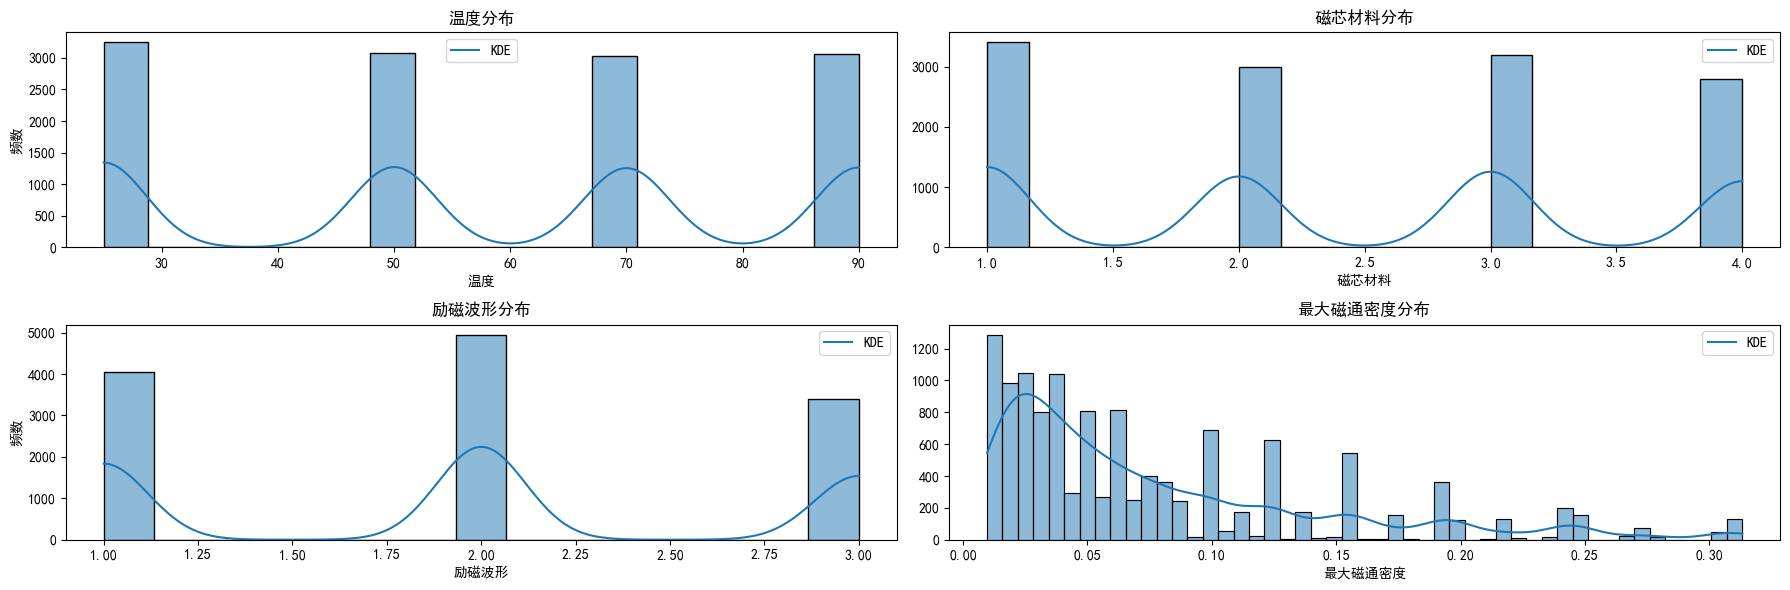

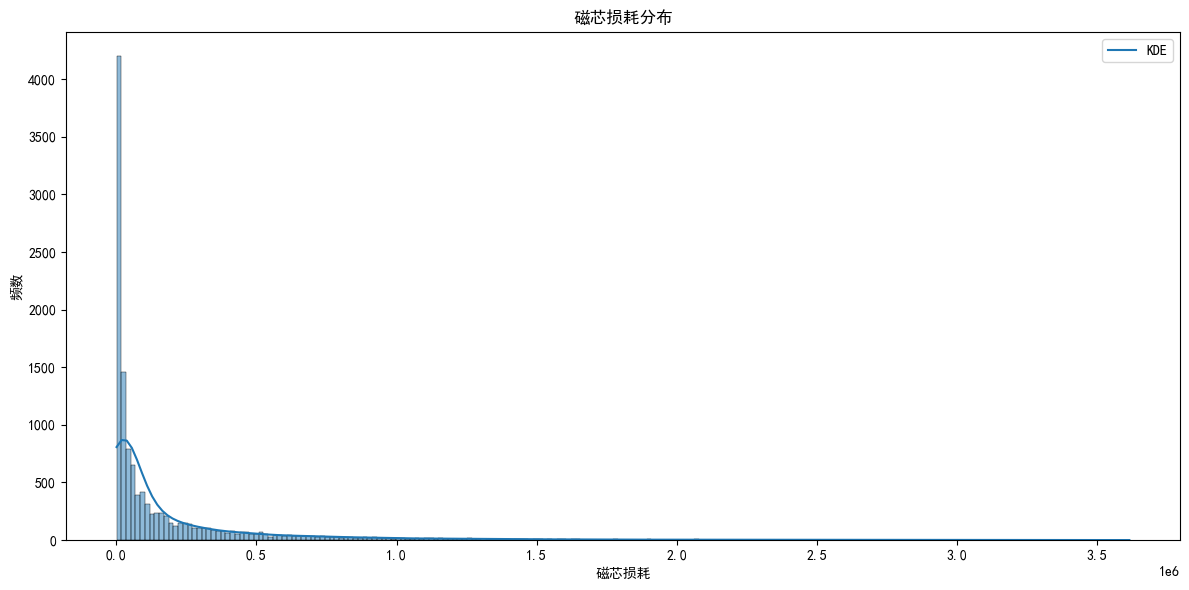

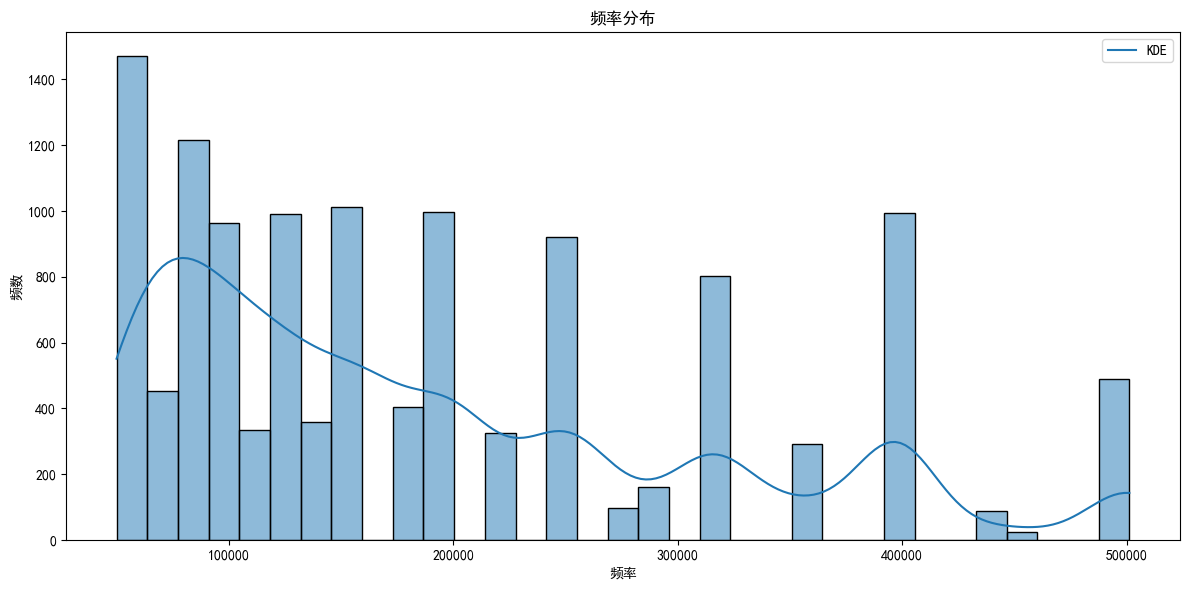

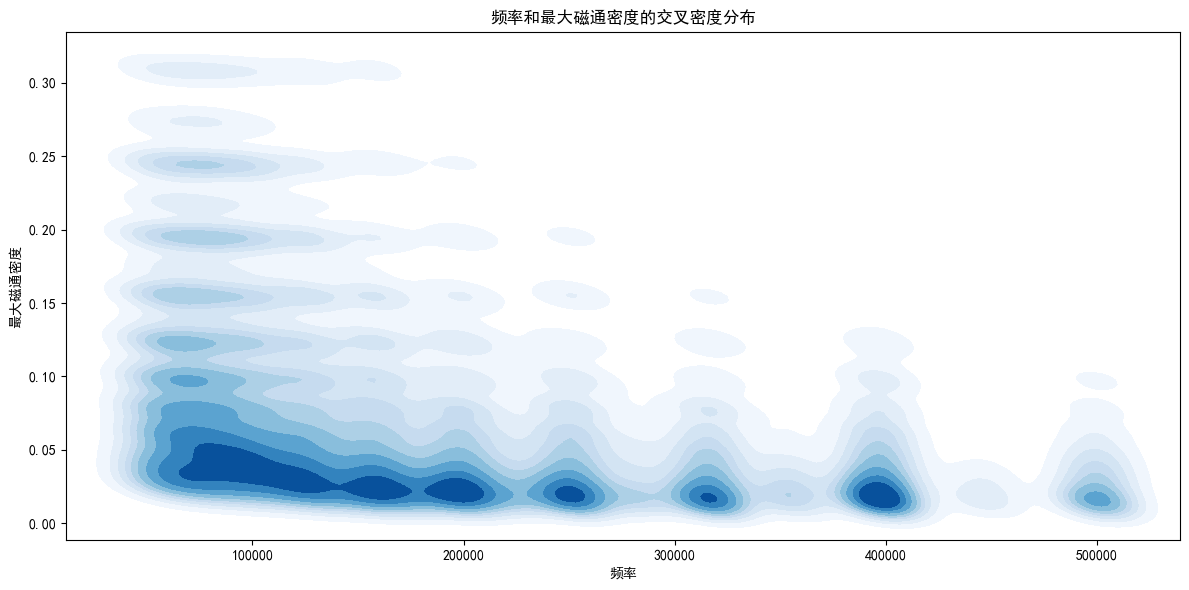

In [521]:
# 绘制数据分布图
plt.figure(figsize=(18, 6))
plt.subplot(2, 2, 1)
# kde kernel density estimation 曲线能更好地表示数据的分布比离散的直方图有更多信息
sns.histplot(data['温度'], kde=True)
plt.legend(['KDE'])
plt.ylabel('频数')
plt.title('温度分布')

plt.subplot(2, 2, 2)
sns.histplot(data['磁芯材料'], kde=True)
plt.legend(['KDE'])
plt.ylabel('')
plt.title('磁芯材料分布')

plt.subplot(2, 2, 3)
sns.histplot(data['励磁波形'], kde=True)
plt.legend(['KDE'])
plt.ylabel('频数')
plt.title('励磁波形分布')

plt.subplot(2, 2, 4)
sns.histplot(data['最大磁通密度'], kde=True)
plt.legend(['KDE'])
plt.ylabel('')
plt.title('最大磁通密度分布')

plt.tight_layout()
plt.show()


# 绘制磁芯损耗分布
plt.figure(figsize=(12, 6))
sns.histplot(data['磁芯损耗'], kde=True)
plt.legend(['KDE'])
plt.ylabel('频数')
plt.title('磁芯损耗分布')

plt.tight_layout()
plt.show()


# 绘制磁芯频率分布
plt.figure(figsize=(12, 6))
sns.histplot(data['频率'], kde=True)
plt.legend(['KDE'])
plt.ylabel('频数')
plt.title('频率分布')
plt.tight_layout()
plt.show()


# 绘制频率和最大磁通密度的交叉密度分布
plt.figure(figsize=(12, 6))
kde = sns.kdeplot(x=data['频率'], y=data['最大磁通密度'], cmap='Blues', fill=True, bw_adjust=0.5)
plt.title('频率和最大磁通密度的交叉密度分布')
plt.xlabel('频率')
plt.ylabel('最大磁通密度')
plt.tight_layout()
plt.show()

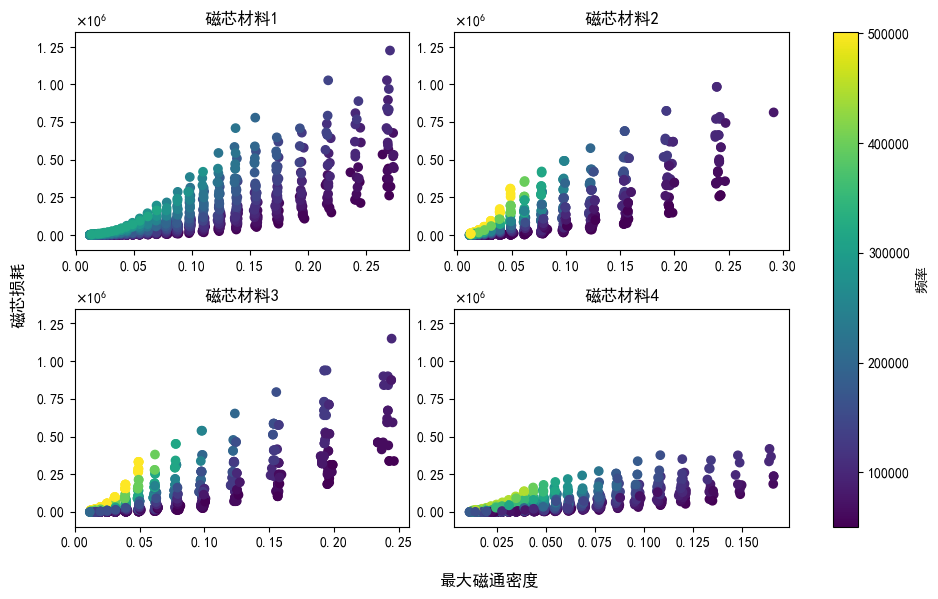

In [522]:
# 只画正弦波的数据
sin_wave_data = data[data['励磁波形'] == 1]

# 创建统一的颜色映射
norm = plt.Normalize(sin_wave_data['频率'].min(), sin_wave_data['频率'].max())
cmap = plt.get_cmap('viridis')

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i, ax in enumerate(axes.flat, 1):
    sc = ax.scatter(
        x=sin_wave_data[sin_wave_data['磁芯材料'] == i]['最大磁通密度'],
        y=sin_wave_data[sin_wave_data['磁芯材料'] == i]['磁芯损耗'],
        marker='o',
        label=f'材料{i}',
        c=sin_wave_data[sin_wave_data['磁芯材料'] == i]['频率'],
        cmap=cmap,
        norm=norm
    )
    ax.set_ylim(-1e5, sin_wave_data['磁芯损耗'].max() * 1.1)
    # 科学计数法style
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
    ax.title.set_text(f'磁芯材料{i}')
    # ax.legend()

fig.supxlabel('最大磁通密度')
fig.supylabel('磁芯损耗')
fig.tight_layout()
# 添加统一的 colorbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical')
cbar.set_label('频率')

plt.show()

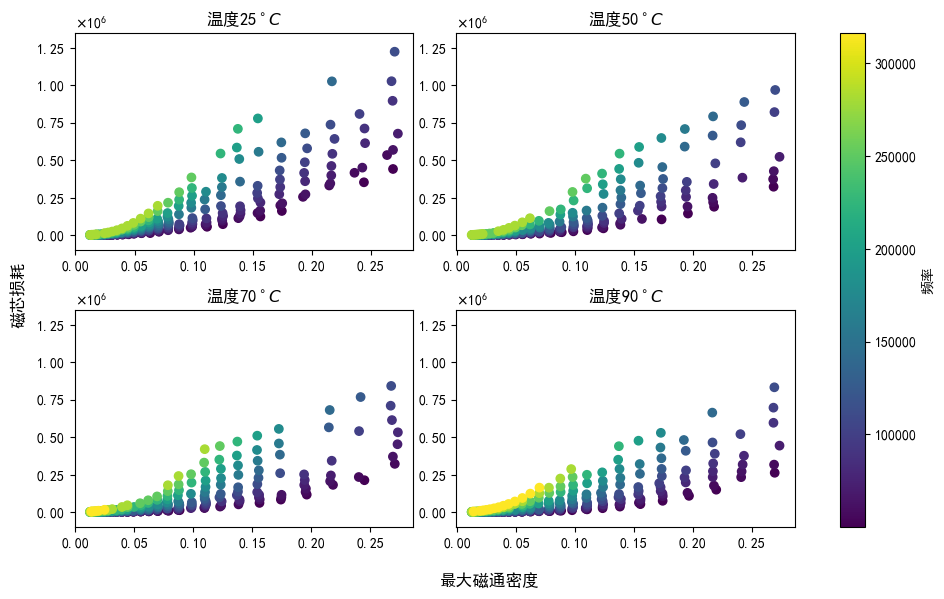

In [523]:
# 相同材料，不同温度画四张
# 只画正弦波的数据
sin_wave_data = data[data['励磁波形'] == 1 & (data['磁芯材料'] == 1)]

# 创建统一的颜色映射
norm = plt.Normalize(sin_wave_data['频率'].min(), sin_wave_data['频率'].max())
cmap = plt.get_cmap('viridis')

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
temps = sin_wave_data['温度'].unique()
temps = sorted(temps)
for i, ax in enumerate(axes.flat):
    sc = ax.scatter(
        x=sin_wave_data[sin_wave_data['温度'] == temps[i]]['最大磁通密度'],
        y=sin_wave_data[sin_wave_data['温度'] == temps[i]]['磁芯损耗'],
        marker='o',
        label=f'温度{temps[i]}$^\circ C$',
        c=sin_wave_data[sin_wave_data['温度'] == temps[i]]['频率'],
        cmap=cmap,
        norm=norm
    )
    ax.set_ylim(-1e5, sin_wave_data['磁芯损耗'].max() * 1.1)
    
    # 科学计数法style
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
    ax.title.set_text(f'温度{temps[i]}$^\circ C$')
    # ax.legend()

fig.supxlabel('最大磁通密度')
fig.supylabel('磁芯损耗')
fig.tight_layout()
# 添加统一的 colorbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical')
cbar.set_label('频率')

plt.show()

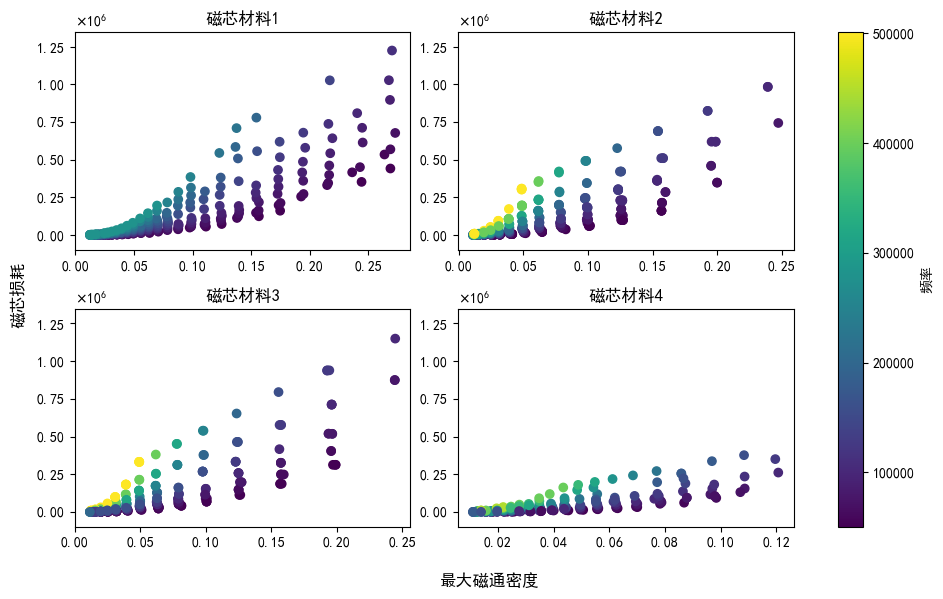

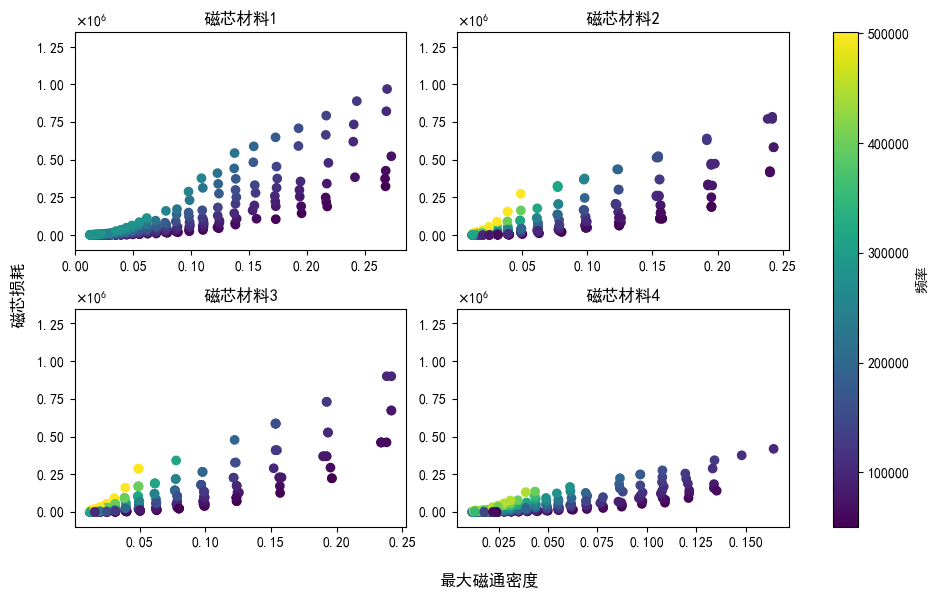

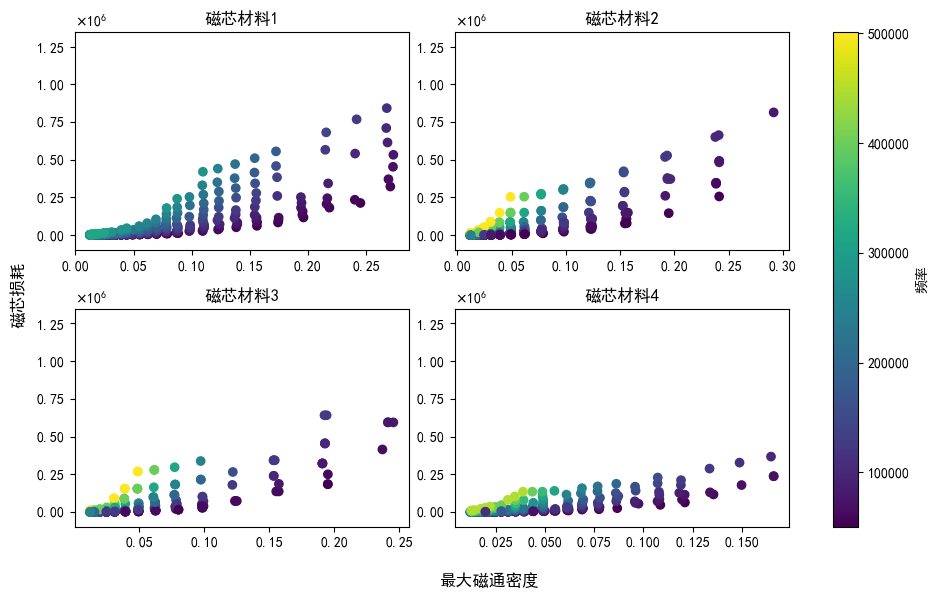

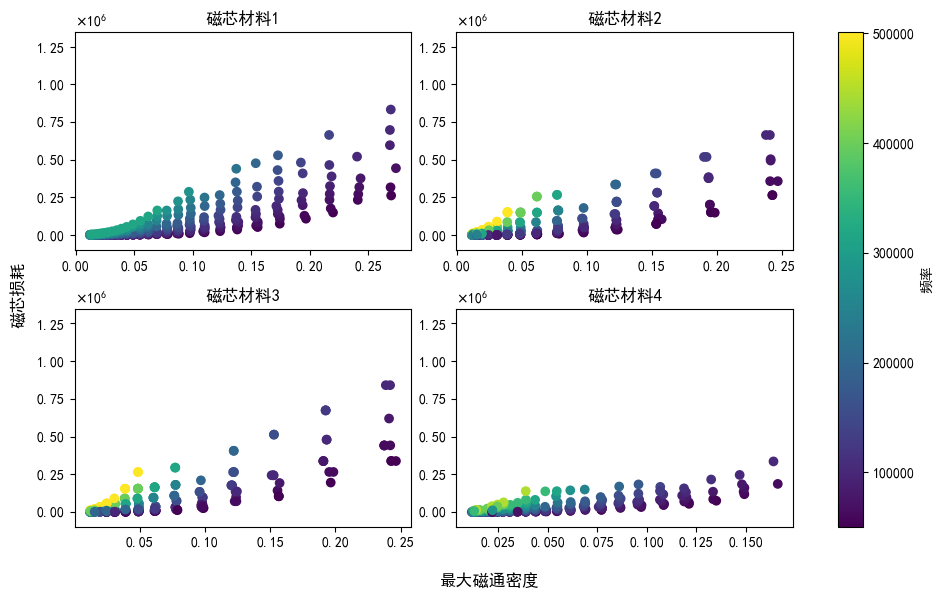

In [524]:
# 只画正弦波以及固定温度的数据
max_y = data[data['励磁波形'] == 1]['磁芯损耗'].max() * 1.1

for temp in data['温度'].unique():
    sin_wave_data = data[(data['励磁波形'] == 1) & (data['温度'] == temp)]

    # 创建统一的颜色映射
    norm = plt.Normalize(sin_wave_data['频率'].min(), sin_wave_data['频率'].max())
    cmap = plt.get_cmap('viridis')

    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    colors = ['r', 'g', 'b', 'y']
    for i, ax in enumerate(axes.flat, 1):
        sc = ax.scatter(
            x=sin_wave_data[sin_wave_data['磁芯材料'] == i]['最大磁通密度'],
            y=sin_wave_data[sin_wave_data['磁芯材料'] == i]['磁芯损耗'],
            marker='o',
            label=f'材料{i}',
            c=sin_wave_data[sin_wave_data['磁芯材料'] == i]['频率'],
            cmap=cmap,
            norm=norm
        )
        
        ax.set_ylim(-1e5, max_y)
        # 科学计数法style
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
        ax.title.set_text(f'磁芯材料{i}')
        # ax.legend()

    fig.supxlabel('最大磁通密度')
    fig.supylabel('磁芯损耗')
    fig.tight_layout()
    # 添加统一的 colorbar
    cbar = fig.colorbar(sc, ax=axes, orientation='vertical')
    cbar.set_label('频率')

    plt.show()

## 限制 data 的波形为正弦波

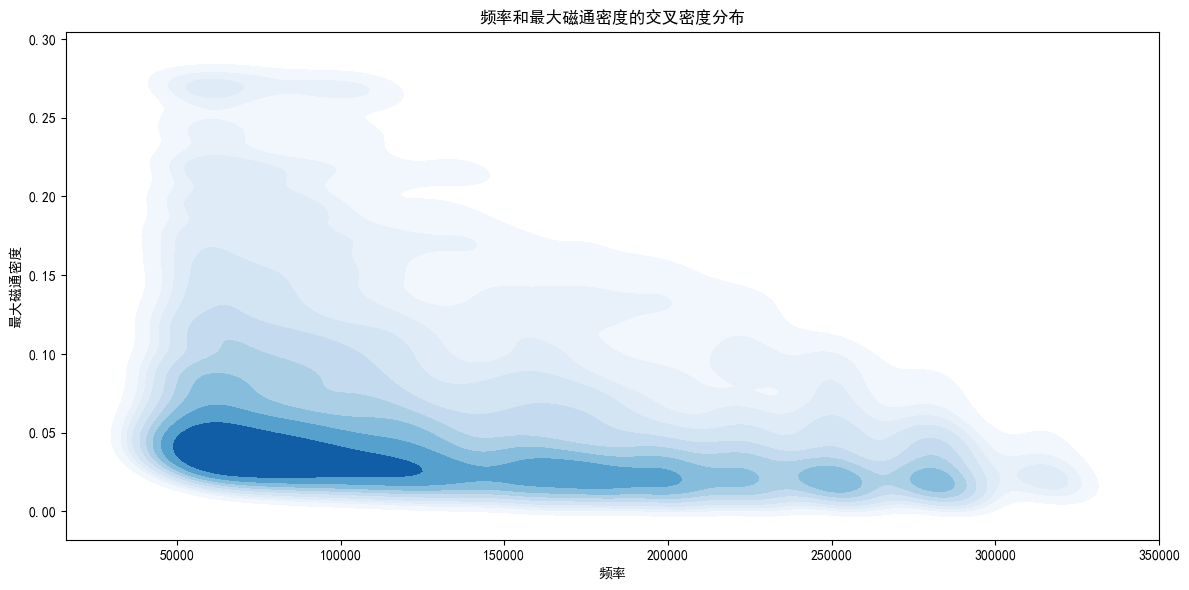

In [525]:
# 输出最大磁通密度和磁芯频率分布最密的数据
# 核密度估计寻找数据分布最密集的区间，使用 sklearn
from sklearn.neighbors import KernelDensity


data = data[(data['励磁波形'] == 1) & (data['磁芯材料'] == 1)]

# 绘制频率和最大磁通密度的交叉密度分布
plt.figure(figsize=(12, 6))
kde = sns.kdeplot(x=data['频率'], y=data['最大磁通密度'], cmap='Blues', fill=True, bw_adjust=0.5)
plt.title('频率和最大磁通密度的交叉密度分布')
plt.xlabel('频率')
plt.ylabel('最大磁通密度')
plt.tight_layout()
plt.show()

kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
# 限制 data 波形为 1
kde.fit(data[['频率', '最大磁通密度']])
density = kde.score_samples(data[['频率', '最大磁通密度']])

temp_data = data.copy()
temp_data['density'] = density
temp_data = temp_data.sort_values(by='density', ascending=False)

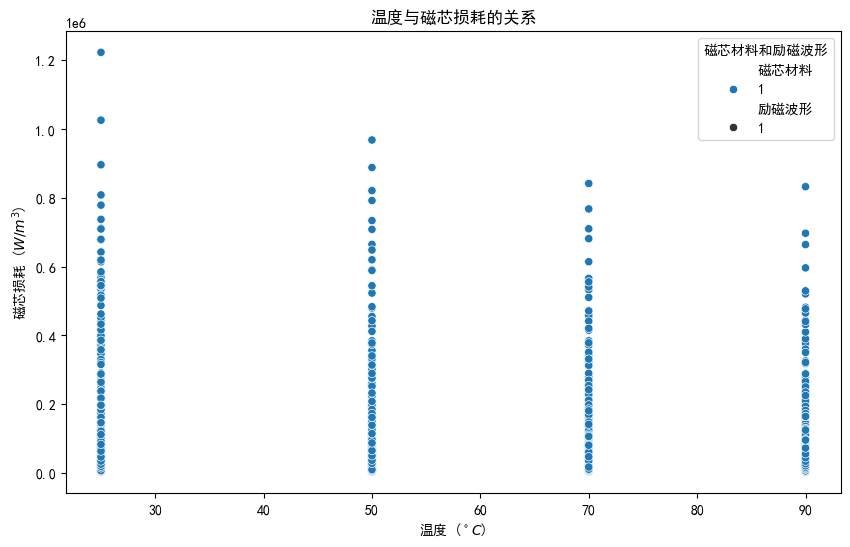

In [526]:
# 绘制温度与磁芯损耗的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='温度', y='磁芯损耗', data=data, hue='磁芯材料', style='励磁波形')
plt.title('温度与磁芯损耗的关系')
plt.xlabel('温度 ($^\circ C$)')
plt.ylabel('磁芯损耗 ($W/m^3$)')
plt.legend(title='磁芯材料和励磁波形')
plt.show()

## 这里使用 kde 按照密度排序之后的好处：可以抽取到相似数据，这些数据的频率非常相似集中，用这些相似的数据方便观察拟合效果

In [580]:
# 获取工况最接近的数据，这里的工况由 温度频率和励磁波形决定
top_density_data = temp_data.head(int(len(temp_data) * 1))
# top_density_data = temp_data.head(int(len(temp_data) * 0.09))
# top_density_data = temp_data.head(int(len(temp_data) * 0.03))
# top_density_data = temp_data[temp_data['频率'] == 396820]


# # 从 top_density_data 中随机抽取 1000 条数据
# top_density_data = temp_data.sample(1000)

sim_data = top_density_data.copy().iloc[:, :-1]
# 用众数固定磁芯材料
sim_data = sim_data[sim_data['磁芯材料'] == sim_data['磁芯材料'].mode()[0]]
# sim_data = sim_data[sim_data['频率'] == sim_data['频率'].mode()[0]]
# 对频率做归一化
sim_data.describe()

温度    磁芯材料    励磁波形          磁芯损耗             频率       最大磁通密度
count  1067.000000  1067.0  1067.0  1.067000e+03    1067.000000  1067.000000
mean     58.926898     1.0     1.0  1.017122e+05  139452.099344     0.079986
std      24.317056     0.0     0.0  1.723295e+05   72097.466942     0.065018
min      25.000000     1.0     1.0  6.840462e+02   50020.000000     0.012287
25%      25.000000     1.0     1.0  3.977152e+03   79460.000000     0.029779
50%      70.000000     1.0     1.0  2.097282e+04  125850.000000     0.055553
75%      90.000000     1.0     1.0  1.142934e+05  199500.000000     0.110384
max      90.000000     1.0     1.0  1.223675e+06  316230.000000     0.273757

拟合结果：k1=3.9947991087793446, alpha1=1.347185737342765, beta1=2.304770829373433


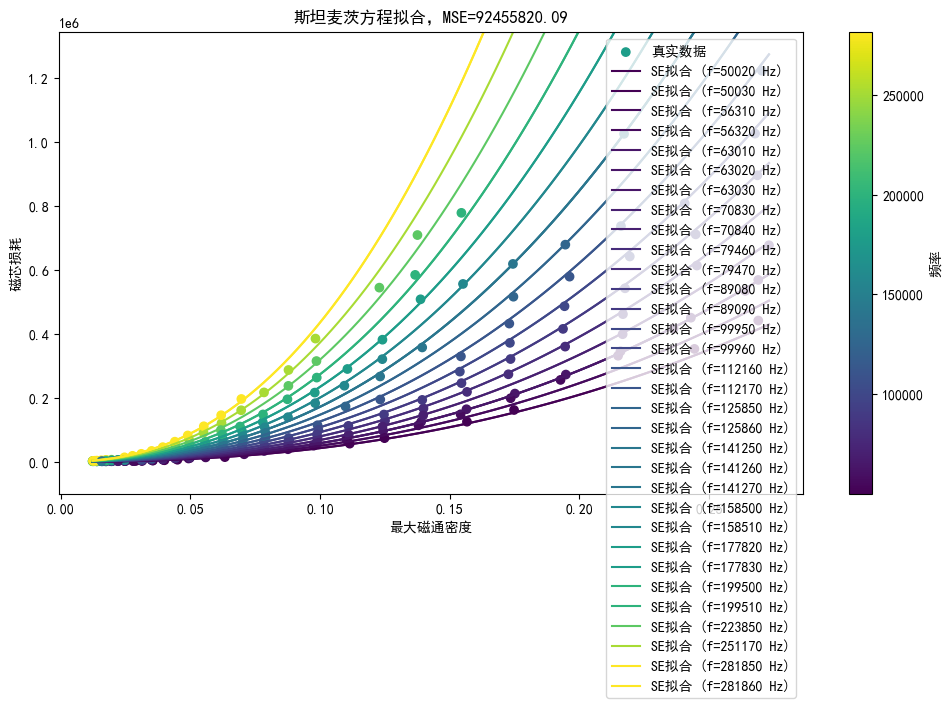

温度 25 拟合结果：k1=3.9947991087793446, alpha1=1.347185737342765, beta1=2.304770829373433
温度 50 拟合结果：k1=0.740657742080484, alpha1=1.491815671575289, beta1=2.482158271135378
温度 70 拟合结果：k1=0.2339332581853254, alpha1=1.591043451325718, beta1=2.5761965630091406
温度 90 拟合结果：k1=0.22204351730322, alpha1=1.6015753720315122, beta1=2.6548805065242056
不同温度下分别拟合mse：[92455820.086363, 50314831.02394682, 83415192.94124924, 117995229.88150893]
标准差：24215060.72466171


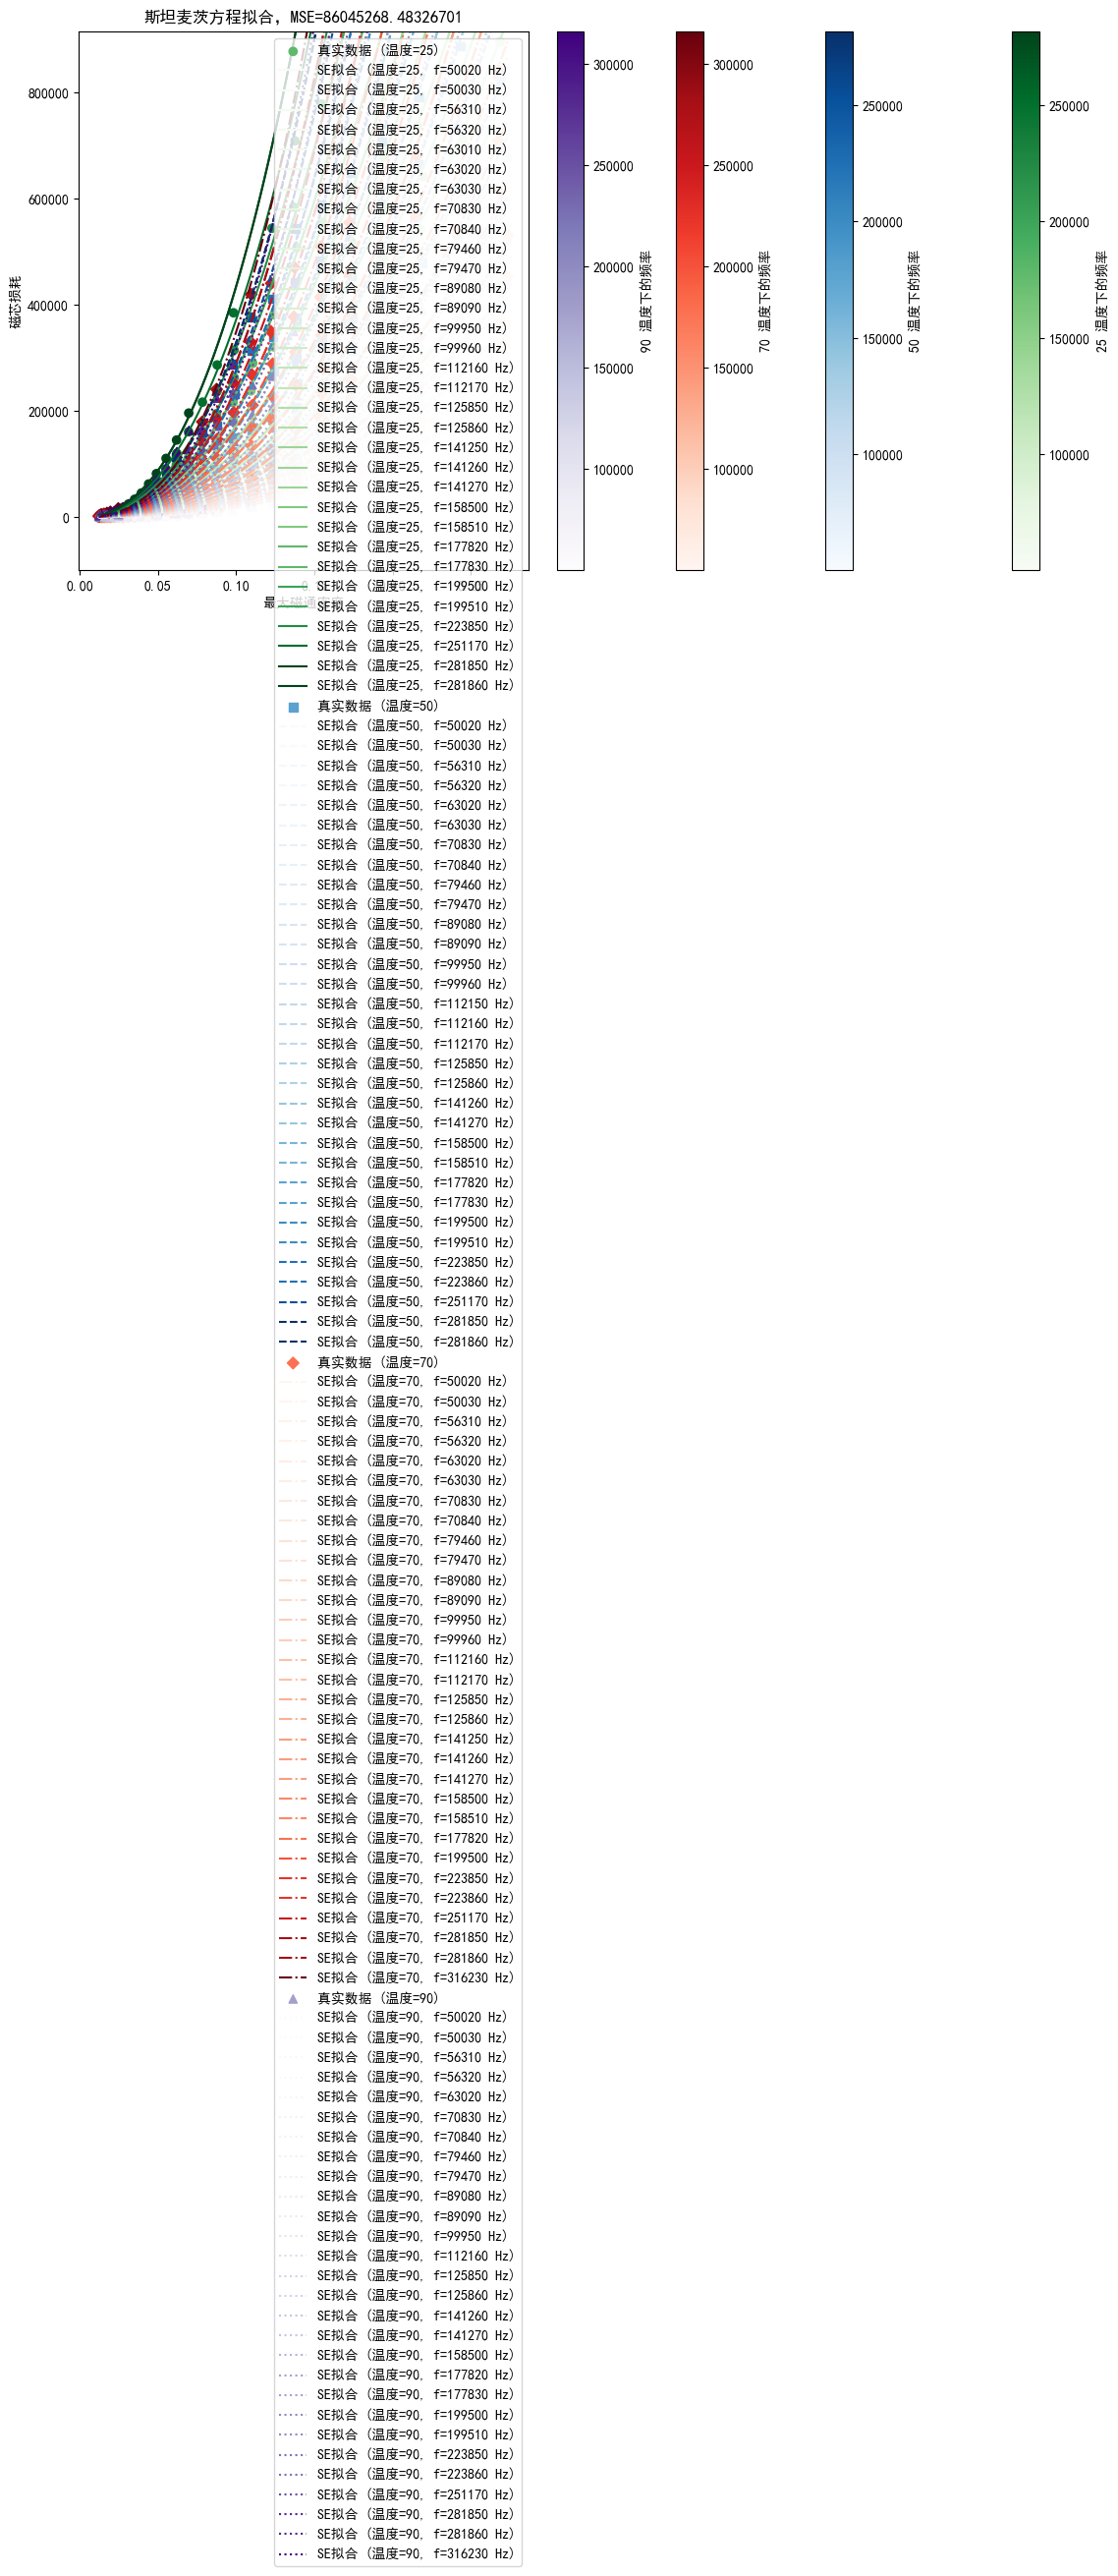

In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    # 定义斯坦麦茨方程
    def steinmetz_equation(f,b, k1, alpha1, beta1):
        return k1 * f ** alpha1 * b ** beta1
    f, b = x
    return steinmetz_equation(f,b, k1, alpha1, beta1)

# 假设 sim_data 已经被读取并包含所需的列
# 提取温度为 25 的数据
tempature = 25
f = sim_data[sim_data["温度"] == tempature]["频率"]
b = sim_data[sim_data["温度"] == tempature]["最大磁通密度"]
p = sim_data[sim_data["温度"] == tempature]["磁芯损耗"]

# 初始猜测参数
initial_guess = [1, 1, 1]

# 拟合参数
popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess, maxfev=10000)

# 提取拟合参数
k1, alpha1, beta1 = popt

print(f"拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
plt.figure(figsize=(12, 6))
# 防止所有频率相同导致颜色映射无法正常工作
if f.min() == f.max():
    norm = plt.Normalize(f.min() - 1, f.max() + 1)
else:
    norm = plt.Normalize(f.min(), f.max())
cmap = plt.get_cmap('viridis')

# 真实数据散点图
sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label='真实数据')

# 计算 mse
mse = np.mean((p - fit_func((f, b), *popt)) ** 2)

# 生成用于绘制曲线的磁通密度范围
b_fit = np.linspace(b.min(), b.max(), 100)

# 对于每个频率，绘制拟合曲线
unique_frequencies = np.unique(f)
for freq in unique_frequencies:
    p_fit = fit_func((freq, b_fit), *popt)
    plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz)', color=cmap(norm(freq)))

plt.ylim(-1e5, p.max() * 1.1)
cbar = plt.colorbar(sc)
cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={mse:.2f}')
plt.legend()
plt.show()

# -------------------------------

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 初始猜测参数
    initial_guess = [1, 1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess)

    # 提取拟合参数
    k1, alpha1, beta1 = popt

    print(f"温度 {temp} 拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

    mses.append(np.mean((p - fit_func((f, b), *popt)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"不同温度下分别拟合mse：{mses}")
print(f"标准差：{np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

拟合结果：k1=4.052107744531213, alpha1=1.3458436306549355, beta1=2.3039345443777113


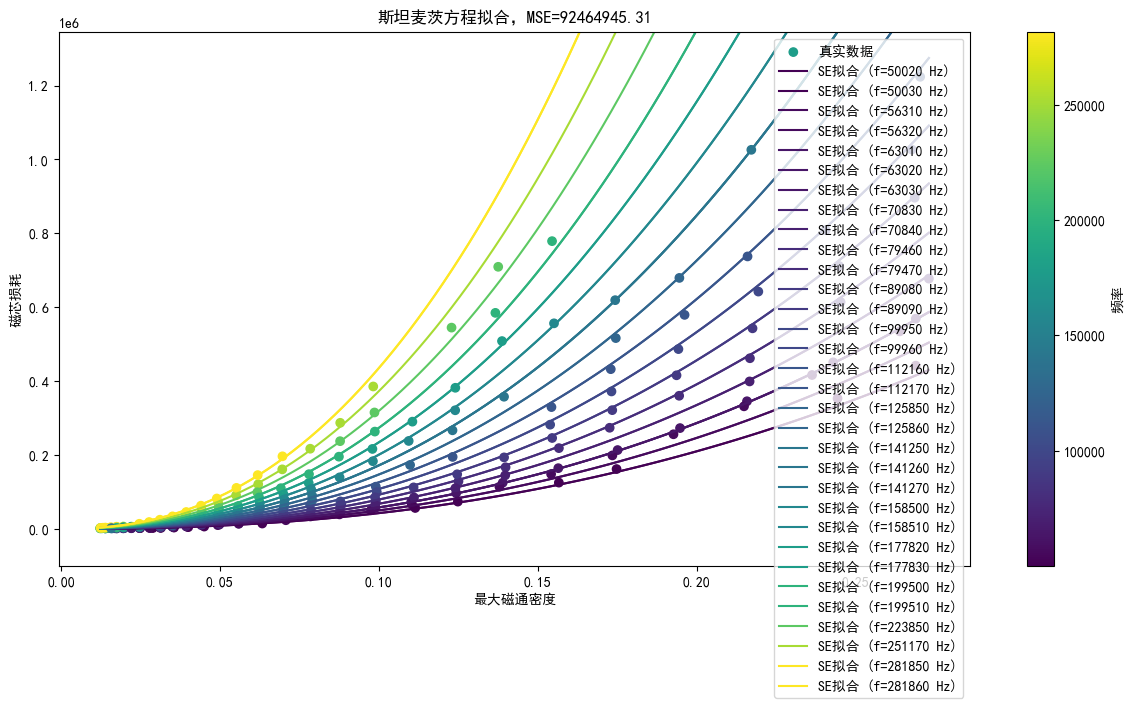

温度 25 拟合结果：k1=4.055914518764403, alpha1=1.3457502465430655, beta1=2.3038449931814893
温度 50 拟合结果：k1=0.7407309689451428, alpha1=1.4918062187540715, beta1=2.482150843070907
温度 70 拟合结果：k1=0.23394430247949843, alpha1=1.5910391086005995, beta1=2.5761945394692436
温度 90 拟合结果：k1=0.22205247842355602, alpha1=1.6015710042423057, beta1=2.654874133973007
不同温度下分别拟合mse：[92466194.27155718, 50314831.27899599, 83415193.00242998, 117995229.93230055]
标准差：24215747.65265818


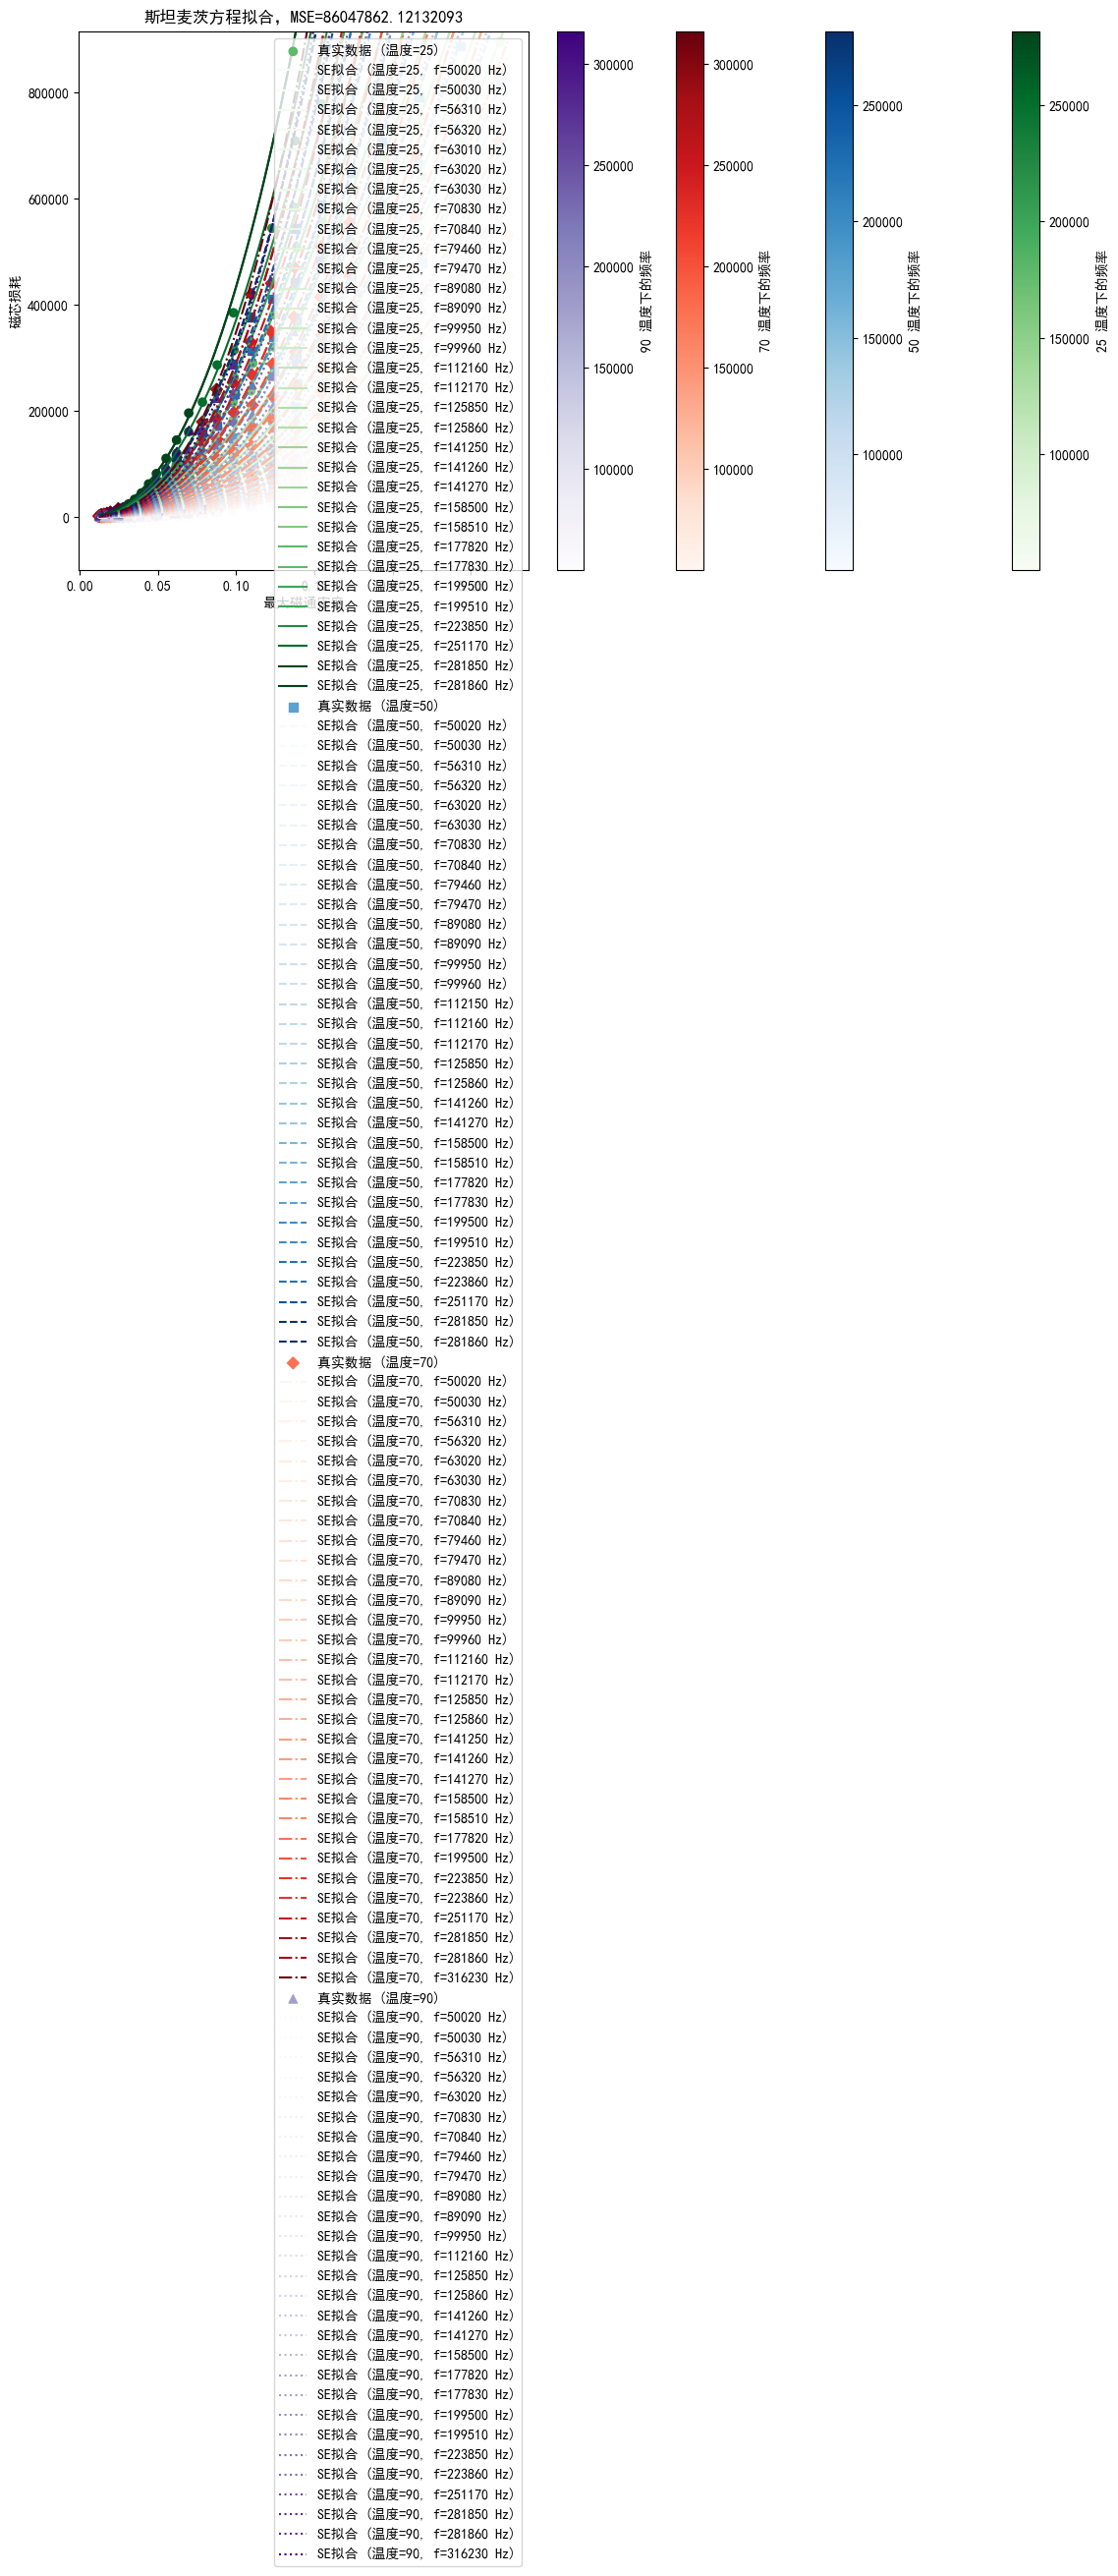

In [583]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    # 定义斯坦麦茨方程
    def steinmetz_equation(f, b, k1, alpha1, beta1):
        return k1 * f ** alpha1 * b ** beta1
    f, b = x
    return steinmetz_equation(f, b, k1, alpha1, beta1)

# 定义误差函数
def error_func(params, x, y):
    return np.sum((fit_func(x, *params) - y) ** 2)

# 假设 sim_data 已经被读取并包含所需的列
# 提取温度为 25 的数据
temperature = 25
f = sim_data[sim_data["温度"] == temperature]["频率"]
b = sim_data[sim_data["温度"] == temperature]["最大磁通密度"]
p = sim_data[sim_data["温度"] == temperature]["磁芯损耗"]

# 设置参数边界
bounds = [(0, 10), (0, 10), (0, 10)]

# 使用遗传算法进行拟合
result = differential_evolution(error_func, bounds, args=((f, b), p), maxiter=1000)

# 提取拟合参数
k1, alpha1, beta1 = result.x

print(f"拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
plt.figure(figsize=(12, 6))
# 防止所有频率相同导致颜色映射无法正常工作
if f.min() == f.max():
    norm = plt.Normalize(f.min() - 1, f.max() + 1)
else:
    norm = plt.Normalize(f.min(), f.max())
cmap = plt.get_cmap('viridis')

# 真实数据散点图
sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label='真实数据')

# 计算 mse
mse = np.mean((p - fit_func((f, b), k1, alpha1, beta1)) ** 2)

# 生成用于绘制曲线的磁通密度范围
b_fit = np.linspace(b.min(), b.max(), 100)

# 对于每个频率，绘制拟合曲线
unique_frequencies = np.unique(f)
for freq in unique_frequencies:
    p_fit = fit_func((np.full_like(b_fit, freq), b_fit), k1, alpha1, beta1)
    plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz)', color=cmap(norm(freq)))

cbar = plt.colorbar(sc)
cbar.set_label('频率')

plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={mse:.2f}')
plt.legend()
plt.show()

# -------------------------------

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 设置参数边界
    bounds = [(0, 10), (0, 10), (0, 10)]

    # 使用遗传算法进行拟合
    result = differential_evolution(error_func, bounds, args=((f, b), p), maxiter=1000)

    # 提取拟合参数
    k1, alpha1, beta1 = result.x

    print(f"温度 {temp} 拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

    mses.append(np.mean((p - fit_func((f, b), k1, alpha1, beta1)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((np.full_like(b_fit, freq), b_fit), k1, alpha1, beta1)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"不同温度下分别拟合mse：{mses}")
print(f"标准差：{np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in power
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in multiply
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)


拟合结果：kh=153.26306876724743, kcl=0.0005913639204609637, ke=-0.05265403173314331, beta1=2.2095949084180844


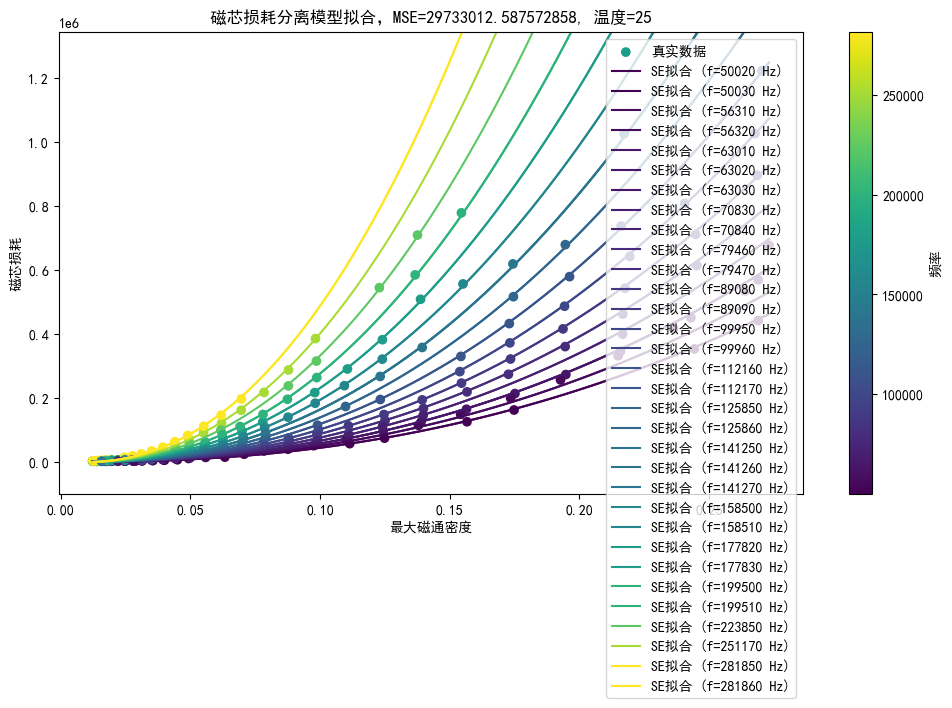

C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in power
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in multiply
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in power
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in power
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4083186359.py:10: RuntimeWarning: overflow encountered in multiply
  return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
C:\Users\12101\AppData\L

温度25下拟合结果：kh=153.26306876724743, kcl=0.0005913639204609637, ke=-0.05265403173314331, beta1=2.2095949084180844
温度50下拟合结果：kh=185.57333695820623, kcl=0.0005383382297264948, ke=-0.03521185341763851, beta1=2.632782465922054
温度70下拟合结果：kh=217.8912316199521, kcl=0.0005238937075619319, ke=-0.033468940354690196, beta1=2.8943614588079924
温度90下拟合结果：kh=281.6993553481207, kcl=0.0005148593557237229, ke=-0.0332211690425546, beta1=3.106393477648237
不同温度下分别拟合mse：[29733012.587572858, 11040990.853209276, 12910895.807200467, 14962225.552519584]
标准差：7389316.692670963


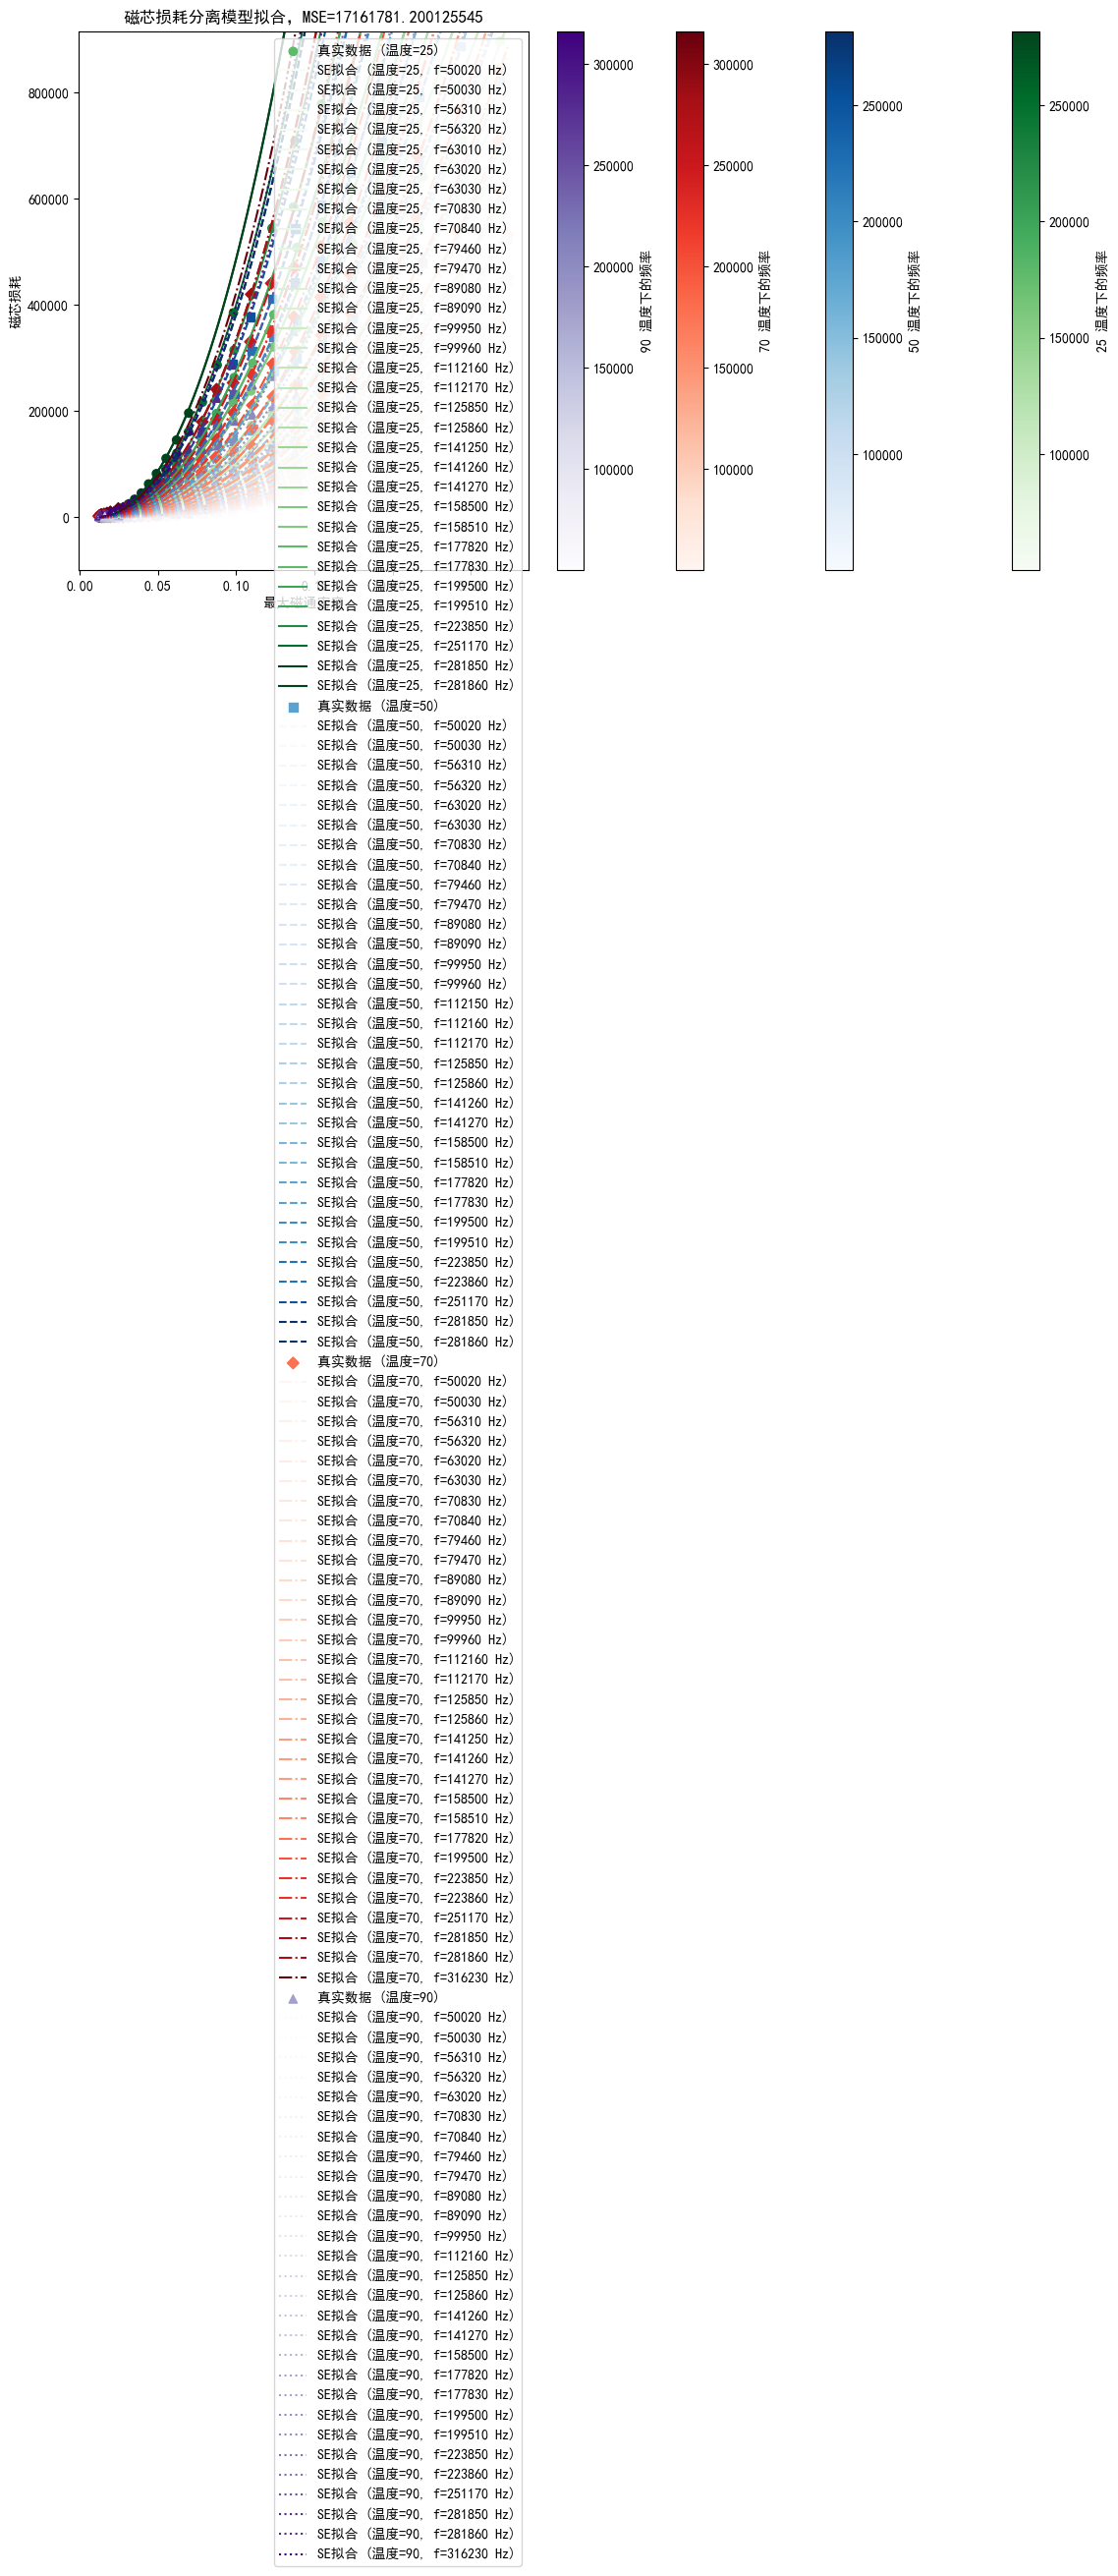

In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



def fit_func(x, kh, kcl, ke, beta1):
    def physical_equation(f,b, kh, kcl, ke, beta1):
        return kh * f * b ** beta1 + kcl * f**2 * b ** 2 + ke * f**(1.5) * b ** (1.5)
    f, b = x
    return physical_equation(f,b, kh, kcl, ke, beta1)

# 假设 sim_data 已经被读取并包含所需的列
# 提取温度为 25 的数据
tempature = 25
f = sim_data[sim_data["温度"] == tempature]["频率"]
b = sim_data[sim_data["温度"] == tempature]["最大磁通密度"]
p = sim_data[sim_data["温度"] == tempature]["磁芯损耗"]

# 初始猜测参数
initial_guess = [1, 1, 1, 1]

# 拟合参数
popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess, maxfev=10000)

# 提取拟合参数
kh, kcl, ke, beta1 = popt
print(f"拟合结果：kh={kh}, kcl={kcl}, ke={ke}, beta1={beta1}")


# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
plt.figure(figsize=(12, 6))
# 防止所有频率相同导致颜色映射无法正常工作
if f.min() == f.max():
    norm = plt.Normalize(f.min() - 1, f.max() + 1)
else:
    norm = plt.Normalize(f.min(), f.max())
cmap = plt.get_cmap('viridis')

# 真实数据散点图
sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label='真实数据')

# 计算 mse
mse = np.mean((p - fit_func((f, b), *popt)) ** 2)

# 生成用于绘制曲线的磁通密度范围
b_fit = np.linspace(b.min(), b.max(), 100)

# 对于每个频率，绘制拟合曲线
unique_frequencies = np.unique(f)
for freq in unique_frequencies:
    p_fit = fit_func((freq, b_fit), *popt)
    plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz)', color=cmap(norm(freq)))

plt.ylim(-1e5, p.max() * 1.1)
cbar = plt.colorbar(sc)
cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'磁芯损耗分离模型拟合，MSE={mse}, 温度={tempature}')
plt.legend()
plt.show()

# ------------------------------------


# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 初始猜测参数
    initial_guess = [1, 1, 1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess, maxfev=10000)

    # 提取拟合参数
    kh, kcl, ke, beta1 = popt

    print(f"温度{temp}下拟合结果：kh={kh}, kcl={kcl}, ke={ke}, beta1={beta1}")

    mses.append(np.mean((p - fit_func((f, b), *popt)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"不同温度下分别拟合mse：{mses}")
print(f"标准差：{np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'磁芯损耗分离模型拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

## 这里证明此处 se 方程在不同温度下同样可以很好拟合，因此大概率 T 的影响体现在 k1 \alpha1 \beta1 上 而根据这里的四次不同温度下的拟合结果，k1 的变化最明显，因此可以假设 T 的影响主要体现在 k1 上
### 如何设计实验：如果要验证T 的修正效果，可以通过训练的时候将四个数据都放入其中，旧模型只能拟合出一条曲线，而加入温度的模型能拟合出四条曲线，且四条曲线和各自的数据点更接近

多种温度一次拟合结果：k1=1.4997609769353453, alpha1=1.4296334638596941, beta1=2.4712537099434537
不同温度数据一次拟合结果：MSE=1638190471.646417


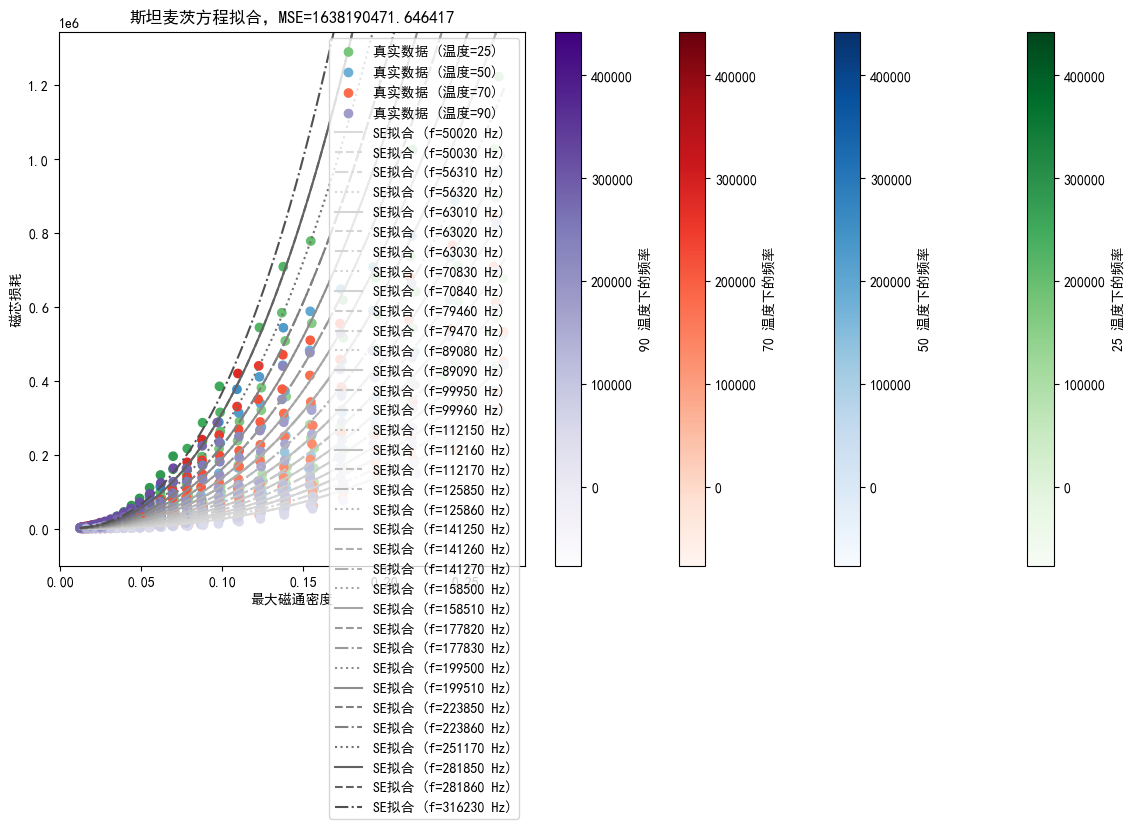

In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    # 定义斯坦麦茨方程
    def steinmetz_equation(f, b, k1, alpha1, beta1):
        return k1 * f ** alpha1 * b ** beta1
    f, b = x
    return steinmetz_equation(f, b, k1, alpha1, beta1)



f = sim_data["频率"]
b = sim_data["最大磁通密度"]
p = sim_data["磁芯损耗"]

# 初始猜测参数
initial_guess = [1, 1, 1]

# 拟合参数
popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess)

# 提取拟合参数
k1, alpha1, beta1 = popt

print(f"多种温度一次拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

mse = np.mean((p - fit_func((f, b), *popt)) ** 2)

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]
cmap_line = plt.get_cmap('Greys')

plt.figure(figsize=(12, 6))

for i, temp in enumerate(temperatures):
    

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min() - 0.4 * f.max(), f.max() + 0.4 * f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])
    scatter_p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]
    scatter_f = sim_data[sim_data["温度"] == temp]["频率"]
    scatter_b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]

    # 真实数据散点图
    sc = plt.scatter(scatter_b, scatter_p, c=scatter_f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})')

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

# 对于每个频率，绘制拟合曲线

unique_frequencies = np.unique(f)
for i, freq in enumerate(unique_frequencies):
    p_fit = fit_func((freq, b_fit), *popt)
    plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz)', color=cmap_line(norm(freq)), linestyle=line_styles[i % len(line_styles)])

print(f"不同温度数据一次拟合结果：MSE={mse}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={mse}')
plt.legend()
plt.show()

C:\Users\12101\AppData\Local\Temp\ipykernel_52636\2163758676.py:12: RuntimeWarning: overflow encountered in power
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\2163758676.py:12: RuntimeWarning: invalid value encountered in multiply
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\2163758676.py:12: RuntimeWarning: invalid value encountered in power
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma


拟合结果：k1=2.9747521343318652, alpha1=1.4668090641971465, beta1=2.451445745778292, gamma=-0.310708711976292, t0=9.179649632513055
多种不同温度数据一次拟合的 MSE: [184052894.09421775, 53916806.209033296, 123870430.40180995, 176509198.70117086]
标准差: 52026124.33255038


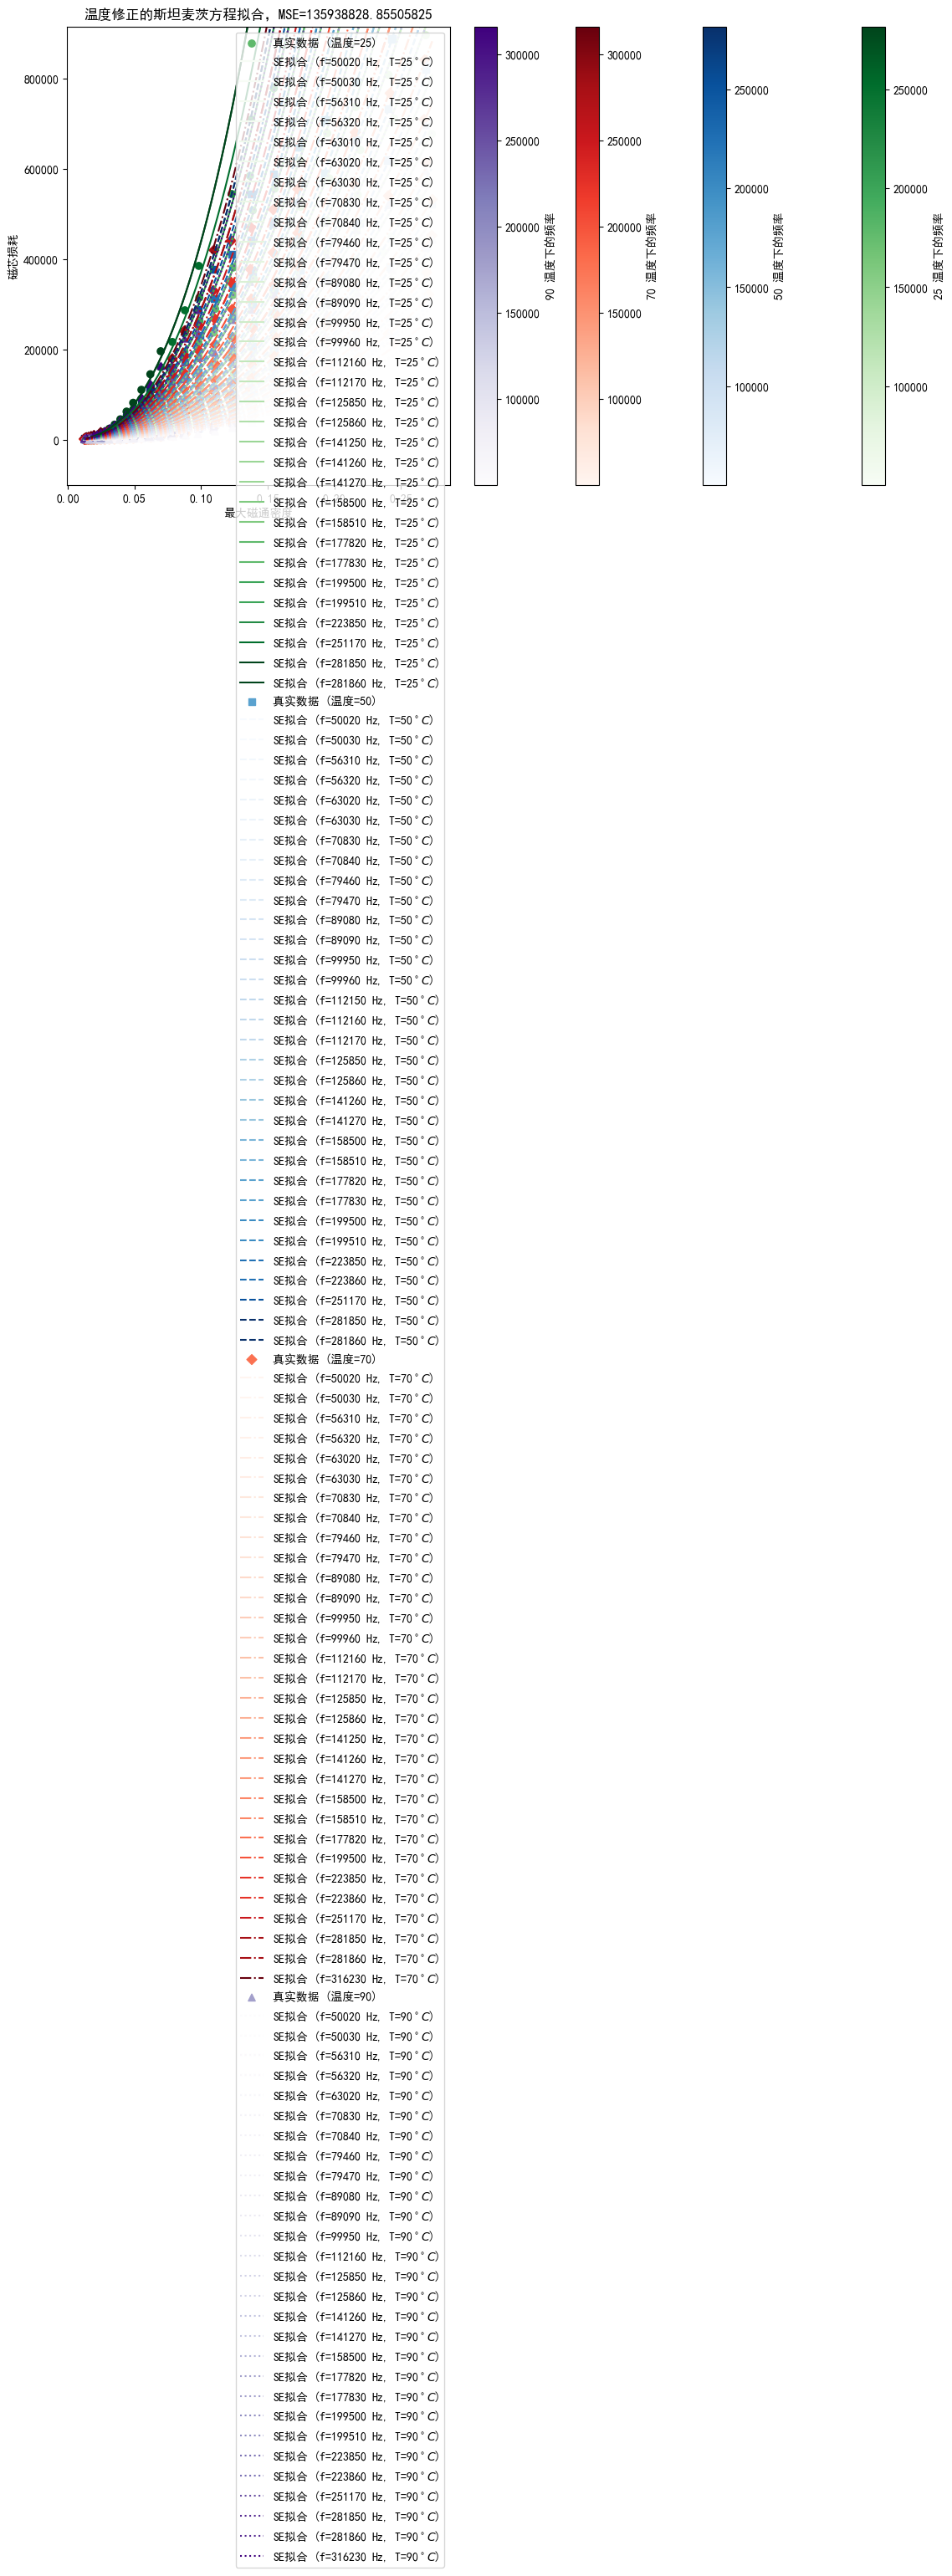

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# 定义拟合函数
def fit_func(x, k1, alpha1, beta1, gamma, t0):
    # 定义斯坦麦茨方程
    def se_with_T(f,b, t, k1, alpha1, beta1, gamma, t0):
        return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
    f, b, t = x
    return se_with_T(f,b,t, k1, alpha1, beta1, gamma, t0)


# 假设 sim_data 已经被读取并包含所需的列
f = sim_data["频率"]
b = sim_data["最大磁通密度"]
p = sim_data["磁芯损耗"]
t = sim_data["温度"]

# 初始猜测参数
initial_guess = [1, 1, 1, -1, 1]

# 拟合参数
popt, pcov = curve_fit(fit_func, (f, b, t), p, p0=initial_guess, maxfev=10000)

# 提取拟合参数
k1, alpha1, beta1, gamma, t0 = popt

print(f"拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}, gamma={gamma}, t0={t0}")

mse = np.mean((p - fit_func((f, b, t), *popt)) ** 2)

# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
# 假设 sim_data 已经被读取并包含所需的列
temperatures = t.unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):

    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]
    f = sim_data[sim_data["温度"] == temp]["频率"]

    mses.append(np.mean((p - fit_func((f, b, temp), *popt)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit, temp), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz, T={temp}$^\circ C$)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"多种不同温度数据一次拟合的 MSE: {mses}")
print(f"标准差: {np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'温度修正的斯坦麦茨方程拟合，MSE={mse}')
plt.legend()
plt.show()

拟合结果：k1=5.221755634856619, alpha1=1.4642892962137426, beta1=2.4514245862327266, gamma=-0.3288038016892958, t0=7.618897567400554, k2=3.9170466996633877
多种不同温度数据一次拟合的 MSE: [182776611.65669256, 53191446.96930695, 125097448.90003337, 177956299.83025774]
标准差: 52245356.17773251


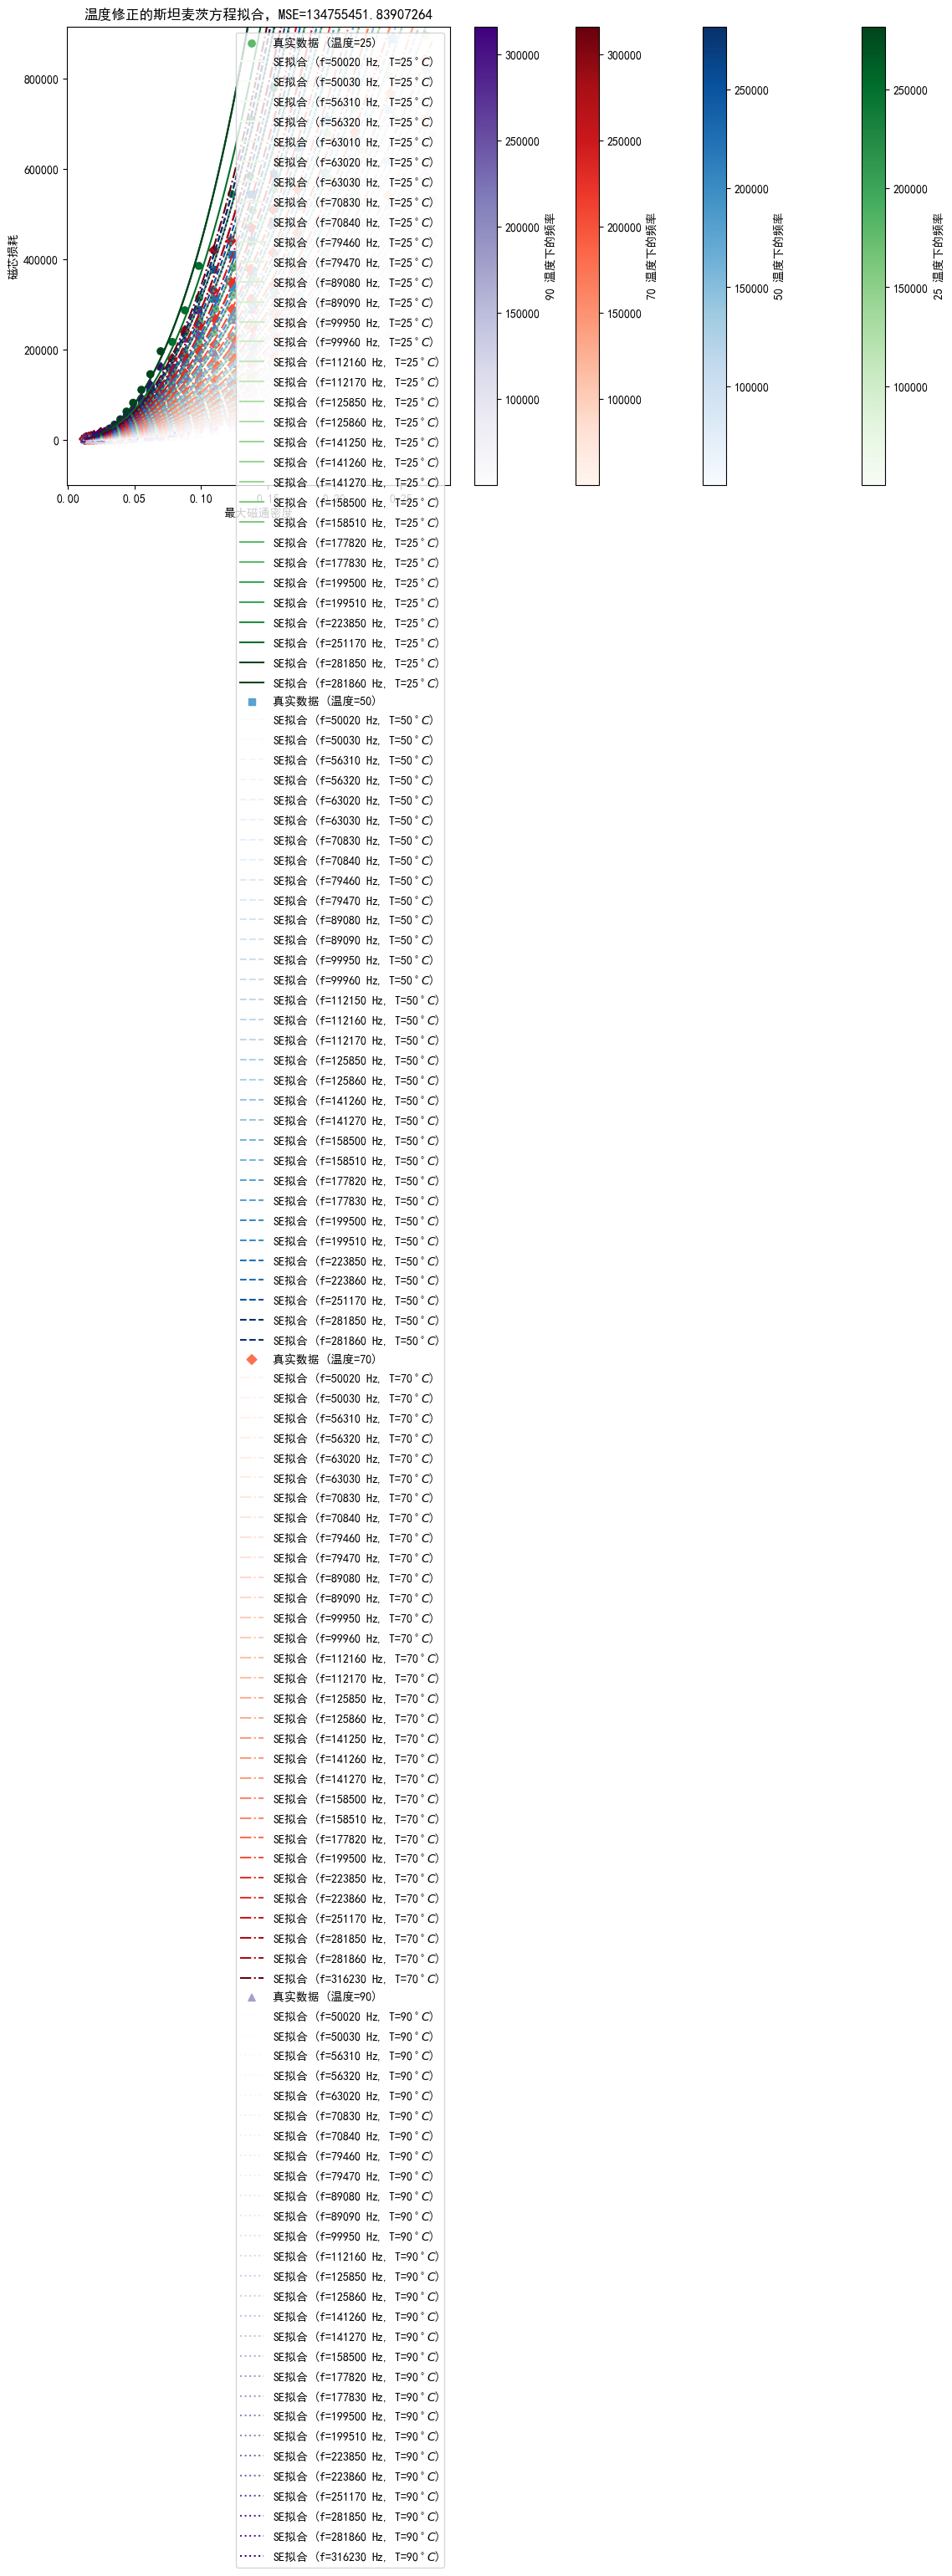

In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1, gamma, t0, k2):
    # 定义斯坦麦茨方程
    def se_with_T(f, b, t, k1, alpha1, beta1, gamma, t0, k2):
        return k1 * f ** alpha1 * b ** beta1 * (1 + k2*(t - t0)) ** gamma
    f, b, t = x
    return se_with_T(f, b, t, k1, alpha1, beta1, gamma, t0, k2)

# 定义误差函数
def error_func(params, x, y):
    return np.sum((fit_func(x, *params) - y) ** 2)

# 假设 sim_data 已经被读取并包含所需的列
f = sim_data["频率"]
b = sim_data["最大磁通密度"]
p = sim_data["磁芯损耗"]
t = sim_data["温度"]

# 设置参数边界
bounds = [(0, 10), (0, 3), (0, 3), (-10, 10), (0, 25), (0, 10)]

# 使用遗传算法进行拟合
result = differential_evolution(error_func, bounds, args=((f, b, t), p), maxiter=100000)

# 提取拟合参数
k1, alpha1, beta1, gamma, t0, k2 = result.x

print(f"拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}, gamma={gamma}, t0={t0}, k2={k2}")

mse = np.mean((p - fit_func((f, b, t), *result.x) ** 2))

# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
temperatures = t.unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]
    f = sim_data[sim_data["温度"] == temp]["频率"]

    mses.append(np.mean((p - fit_func((f, b, temp),*result.x)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((np.full_like(b_fit, freq), b_fit, temp), *result.x)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz, T={temp}$^\circ C$)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"多种不同温度数据一次拟合的 MSE: {mses}")
print(f"标准差: {np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'温度修正的斯坦麦茨方程拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

C:\Users\12101\AppData\Local\Temp\ipykernel_52636\2706619796.py:10: RuntimeWarning: overflow encountered in power
  return k1 * f ** alpha1 * b ** beta1


温度 25 拟合结果：k1=6.7520001567626275, alpha1=1.3321913715496874, beta1=2.4695085276079514
温度 50 拟合结果：k1=0.009339885938611764, alpha1=1.8664497502168633, beta1=2.5667800785397605
温度 70 拟合结果：k1=0.09716537624302203, alpha1=1.6732780256249944, beta1=2.6543049392791125
温度 90 拟合结果：k1=6.941555203065625, alpha1=1.3279899937947224, beta1=2.741621153418772
不同温度下分别拟合mse：[1468128.4682731724, 2465672.824744609, 2443609.417571169, 2079514.6356261794]
标准差：403316.00687308674


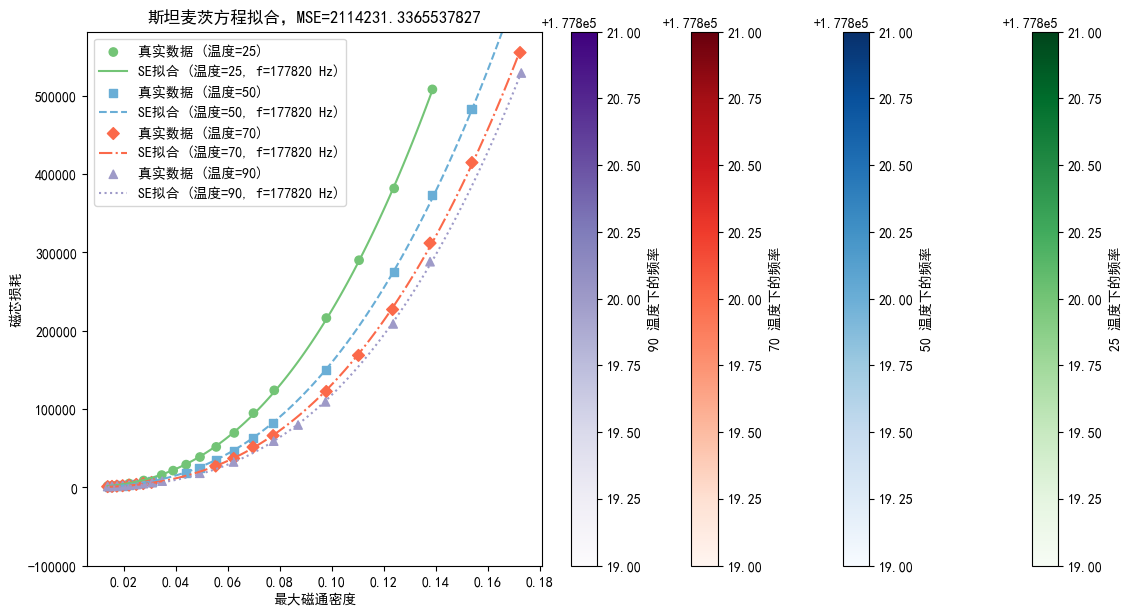

In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    # 定义斯坦麦茨方程
    def steinmetz_equation(f, b, k1, alpha1, beta1):
        return k1 * f ** alpha1 * b ** beta1
    f, b = x
    return steinmetz_equation(f, b, k1, alpha1, beta1)

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 初始猜测参数
    initial_guess = [1, 1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess)

    # 提取拟合参数
    k1, alpha1, beta1 = popt

    print(f"温度 {temp} 拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

    mses.append(np.mean((p - fit_func((f, b), *popt)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"不同温度下分别拟合mse：{mses}")
print(f"标准差：{np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'斯坦麦茨方程拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4099127384.py:13: RuntimeWarning: overflow encountered in power
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4099127384.py:13: RuntimeWarning: invalid value encountered in multiply
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
C:\Users\12101\AppData\Local\Temp\ipykernel_52636\4099127384.py:13: RuntimeWarning: invalid value encountered in power
  return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma


拟合结果：k1=1.4120165316710807, alpha1=1.4405356405862157, beta1=2.346193583461976, gamma=-0.0032512215119290468, t0=24.923081771252562
拟合结果：k1=0.9388162107068654, alpha1=1.5609199834218648, beta1=2.513226507000425, gamma=0.498134326417687, t0=49.865923718867286
拟合结果：k1=0.11053051559268631, alpha1=1.6815311202629446, beta1=2.633987752253765, gamma=0.7818654391999561, t0=69.25491414085576
拟合结果：k1=0.5693150875810243, alpha1=1.6968325806429507, beta1=2.7397944995223042, gamma=0.7609889142759831, t0=89.92121640644963
多种不同温度数据一次拟合的 MSE: [39677900.546669416, 29935042.012746003, 49329980.745075524, 57417816.42437385]
标准差: 10306764.112959722


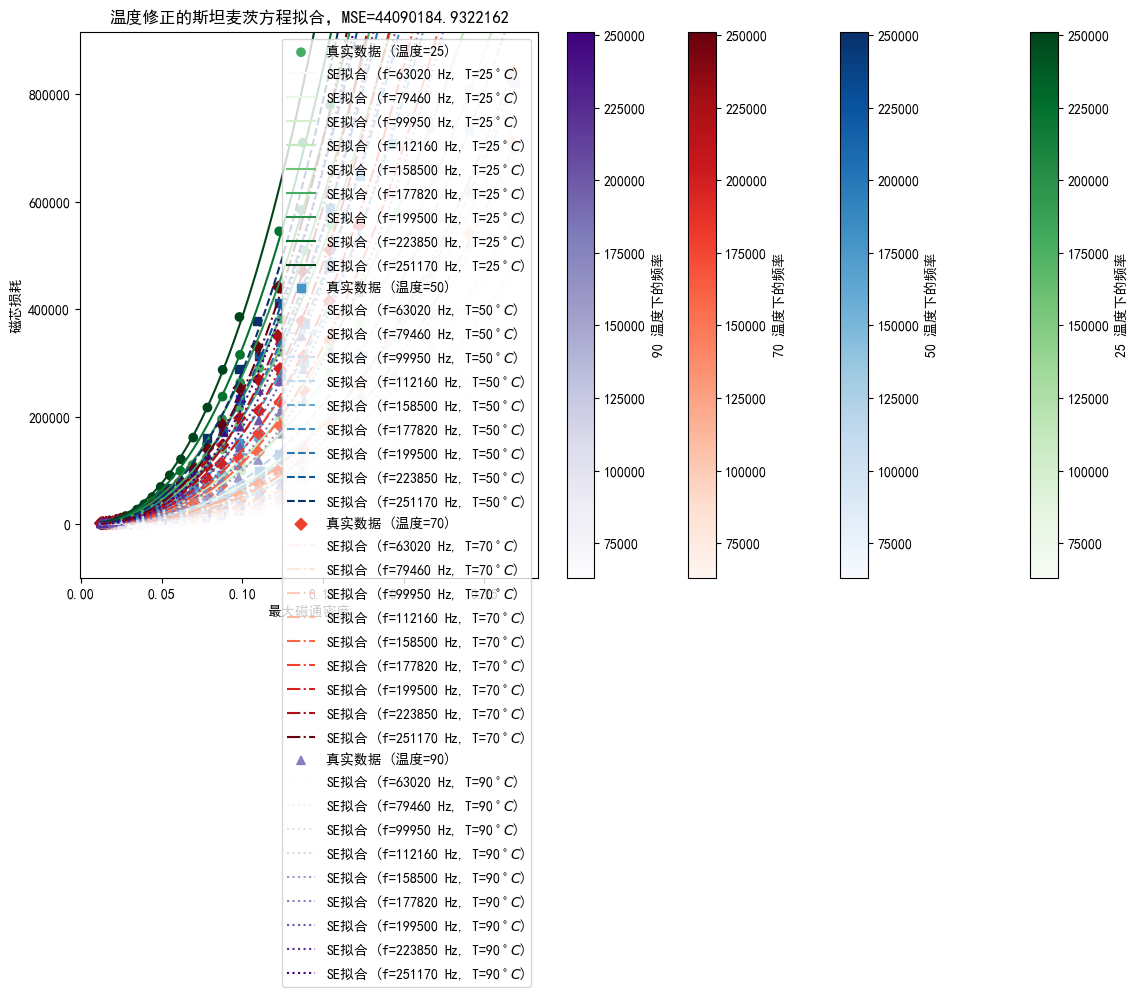

In [534]:
# 多次拟合
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# 定义拟合函数
def fit_func(x, k1, alpha1, beta1, gamma, t0):
    # 定义斯坦麦茨方程
    def se_with_T(f,b, t, k1, alpha1, beta1, gamma, t0):
        return k1 * f ** alpha1 * b ** beta1 * (t - t0)**gamma
    f, b, t = x
    return se_with_T(f,b,t, k1, alpha1, beta1, gamma, t0)



t = sim_data["温度"]
# 绘制拟合结果，和之前的可视化方式一样 以最大磁通密度为横坐标，磁芯损耗为纵坐标，不同颜色代表不同频率
# 假设 sim_data 已经被读取并包含所需的列
temperatures = t.unique()
temperatures = sorted(temperatures)
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

plt.figure(figsize=(12, 6))

mses = []

for i, temp in enumerate(temperatures):

    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]
    f = sim_data[sim_data["温度"] == temp]["频率"]
    t = np.ones_like(f) * temp


    # 初始猜测参数
    initial_guess = [1, 1, 1, -1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b, t), p, p0=initial_guess, maxfev=10000)

    # 提取拟合参数
    k1, alpha1, beta1, gamma, t0 = popt

    print(f"拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}, gamma={gamma}, t0={t0}")

    mses.append(np.mean((p - fit_func((f, b, temp), *popt)) ** 2))

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap(cmaps[i % len(cmaps)])

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit, temp), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (f={freq} Hz, T={temp}$^\circ C$)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])
    cbar = plt.colorbar(sc)
    cbar.set_label(f"{temp} 温度下的频率")

print(f"多种不同温度数据一次拟合的 MSE: {mses}")
print(f"标准差: {np.std(mses)}")
plt.ylim(-1e5, p.max() * 1.1)
plt.tight_layout()
# cbar = plt.colorbar(sc)
# cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title(f'温度修正的斯坦麦茨方程拟合，MSE={np.mean(mses)}')
plt.legend()
plt.show()

## 一个结论，se 经验方程在不同的温度下分别拟合，同样可以获得较好的拟合效果，问题在于如果将多种不同的温度下的数据混合在一起拟合，se经验方程只能拟合出一条曲线，对于多种不同温度的数据来说，精度不佳，经过引入温度的修正后，不同温度的拟合数据都可以获得较好的拟合效果，这样可以更好的拟合不同温度下的数据，但是这样的方法也有一定的局限性，比如温度的变化范围，如果温度的变化范围过大，那么可能会导致拟合效果不佳，因此在实际应用中，需要根据具体情况来选择合适的拟合方法。

温度 25 拟合结果：k1=1.423840406224345, alpha1=1.4405356939644631, beta1=2.3461936117659183
温度 50 拟合结果：k1=0.34505199757278454, alpha1=1.5609199656042783, beta1=2.513226504843387
温度 70 拟合结果：k1=0.08781437908612841, alpha1=1.6815310550674964, beta1=2.633987740315364
温度 90 拟合结果：k1=0.0823289473555156, alpha1=1.6968325982483108, beta1=2.7397945125268013


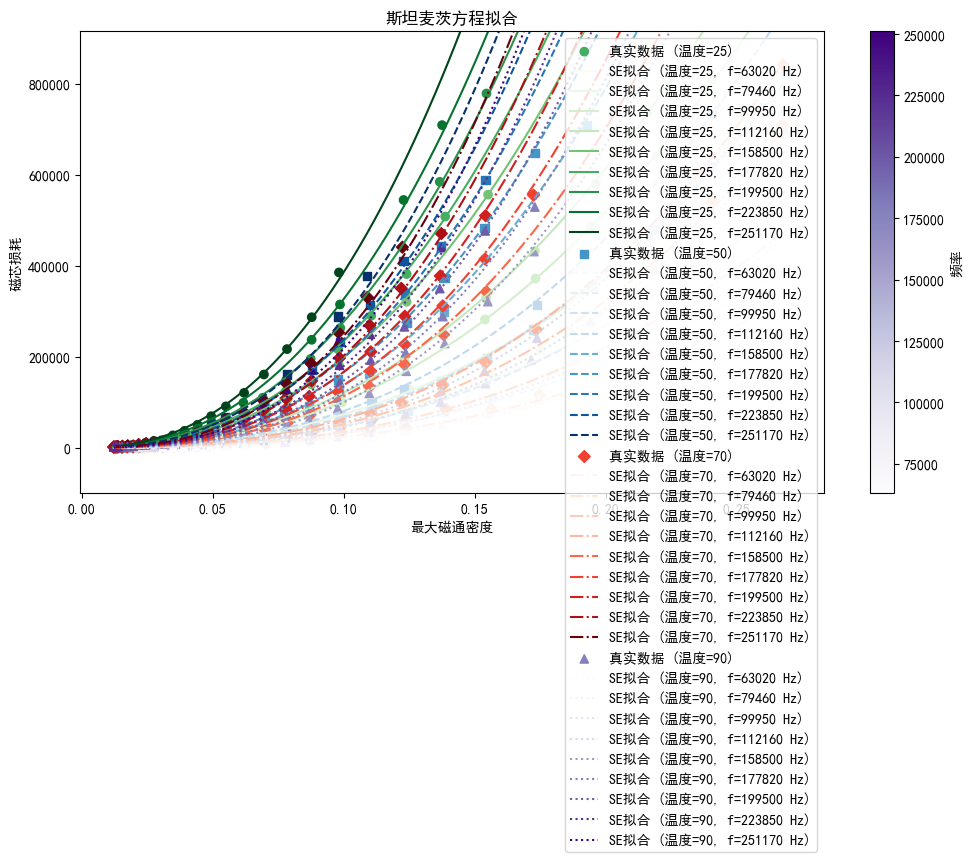

k1(T) 拟合参数: [ 5.17028873e-04 -7.96425631e-02  3.07948687e+00]
alpha1(T) 拟合参数: [-4.20777219e-05  8.98309191e-03  1.23682399e+00]
beta1(T) 拟合参数: [-1.62099225e-05  7.92511603e-03  2.15804628e+00]


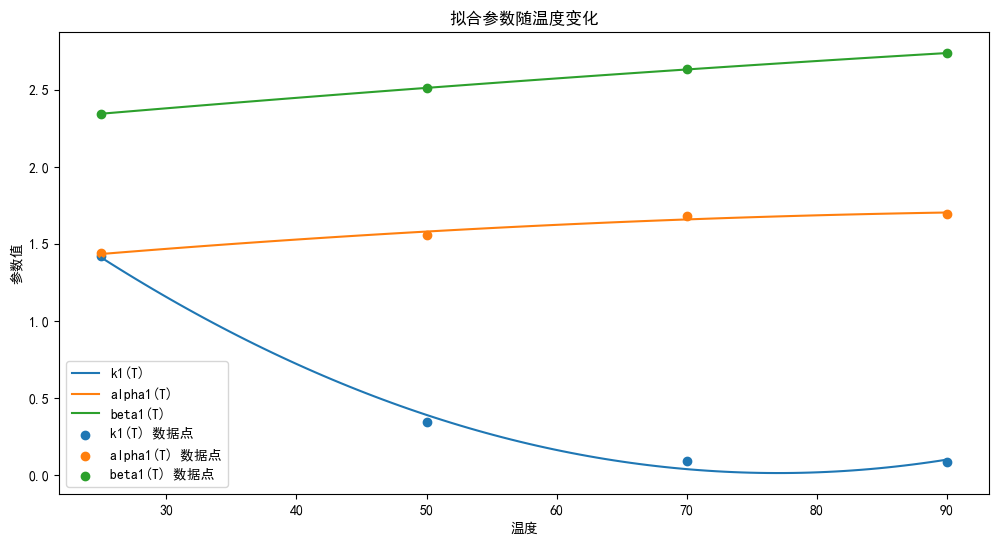

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    # 定义斯坦麦茨方程
    def steinmetz_equation(f, b, k1, alpha1, beta1):
        return k1 * f ** alpha1 * b ** beta1
    f, b = x
    return steinmetz_equation(f, b, k1, alpha1, beta1)

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']
cmaps = [plt.get_cmap('Greens'), plt.get_cmap('Blues'), plt.get_cmap('Reds'), plt.get_cmap('Purples')]

# 存储拟合参数
fit_params = []

plt.figure(figsize=(12, 6))

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 初始猜测参数
    initial_guess = [1, 1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess)
    fit_params.append((temp, *popt))

    # 提取拟合参数
    k1, alpha1, beta1 = popt

    print(f"温度 {temp} 拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = cmaps[i % len(cmaps)]

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = fit_func((freq, b_fit), *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])

cbar = plt.colorbar(sc)
cbar.set_label('频率')

plt.ylim(-1e5, p.max() * 1.1)
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title('斯坦麦茨方程拟合')
plt.legend()
plt.show()

# 将拟合参数转换为 DataFrame
fit_params_df = pd.DataFrame(fit_params, columns=["温度", "k1", "alpha1", "beta1"])

# 拟合 k1, alpha1, beta1 随温度变化的函数
def poly_fit(x, a, b, c):
    return a * x**2 + b * x + c

k1_params, _ = curve_fit(poly_fit, fit_params_df["温度"], fit_params_df["k1"])
alpha1_params, _ = curve_fit(poly_fit, fit_params_df["温度"], fit_params_df["alpha1"])
beta1_params, _ = curve_fit(poly_fit, fit_params_df["温度"], fit_params_df["beta1"])

# 打印拟合结果
print(f"k1(T) 拟合参数: {k1_params}")
print(f"alpha1(T) 拟合参数: {alpha1_params}")
print(f"beta1(T) 拟合参数: {beta1_params}")

# 绘制 k1, alpha1, beta1 随温度变化的曲线
T_fit = np.linspace(temperatures.min(), temperatures.max(), 100)
k1_fit = poly_fit(T_fit, *k1_params)
alpha1_fit = poly_fit(T_fit, *alpha1_params)
beta1_fit = poly_fit(T_fit, *beta1_params)

plt.figure(figsize=(12, 6))
plt.plot(T_fit, k1_fit, label='k1(T)')
plt.plot(T_fit, alpha1_fit, label='alpha1(T)')
plt.plot(T_fit, beta1_fit, label='beta1(T)')
plt.scatter(fit_params_df["温度"], fit_params_df["k1"], label='k1(T) 数据点')
plt.scatter(fit_params_df["温度"], fit_params_df["alpha1"], label='alpha1(T) 数据点')
plt.scatter(fit_params_df["温度"], fit_params_df["beta1"], label='beta1(T) 数据点')
plt.xlabel('温度')
plt.ylabel('参数值')
plt.title('拟合参数随温度变化')
plt.legend()
plt.show()

In [536]:
# 四次分别拟合查看k1 变化

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义斯坦麦茨方程
def steinmetz_equation_fixed(f, T, b, k1, alpha1, beta1):
    return k1 / T * f ** alpha1 * b ** beta1

# 定义拟合函数
def fit_func(x, k1, alpha1, beta1):
    f, b = x
    return steinmetz_equation_fixed(f, b, k1, alpha1, beta1)

# 假设 sim_data 已经被读取并包含所需的列
temperatures = sim_data["温度"].unique()
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^']

plt.figure(figsize=(12, 6))

for i, temp in enumerate(temperatures):
    f = sim_data[sim_data["温度"] == temp]["频率"]
    b = sim_data[sim_data["温度"] == temp]["最大磁通密度"]
    p = sim_data[sim_data["温度"] == temp]["磁芯损耗"]

    # 初始猜测参数
    initial_guess = [1, 1, 1]

    # 拟合参数
    popt, pcov = curve_fit(fit_func, (f, b), p, p0=initial_guess)

    # 提取拟合参数
    k1, alpha1, beta1 = popt

    print(f"温度 {temp} 拟合结果：k1={k1}, alpha1={alpha1}, beta1={beta1}")

    # 防止所有频率相同导致颜色映射无法正常工作
    if f.min() == f.max():
        norm = plt.Normalize(f.min() - 1, f.max() + 1)
    else:
        norm = plt.Normalize(f.min(), f.max())
    cmap = plt.get_cmap('viridis')

    # 真实数据散点图
    sc = plt.scatter(b, p, c=f, cmap=cmap, norm=norm, label=f'真实数据 (温度={temp})', marker=markers[i % len(markers)])

    # 生成用于绘制曲线的磁通密度范围
    b_fit = np.linspace(b.min(), b.max(), 100)

    # 对于每个频率，绘制拟合曲线
    unique_frequencies = np.unique(f)
    for freq in unique_frequencies:
        p_fit = steinmetz_equation(freq, b_fit, *popt)
        plt.plot(b_fit, p_fit, label=f'SE拟合 (温度={temp}, f={freq} Hz)', color=cmap(norm(freq)), linestyle=line_styles[i % len(line_styles)])

plt.ylim(-1e5, p.max() * 1.1)
cbar = plt.colorbar(sc)
cbar.set_label('频率')
plt.xlabel('最大磁通密度')
plt.ylabel('磁芯损耗')
plt.title('斯坦麦茨方程拟合')
plt.legend()
plt.show()

TypeError: steinmetz_equation_fixed() missing 1 required positional argument: 'beta1'

拟合结果：a=2344438.930192005, b=-13175742.6545843


c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


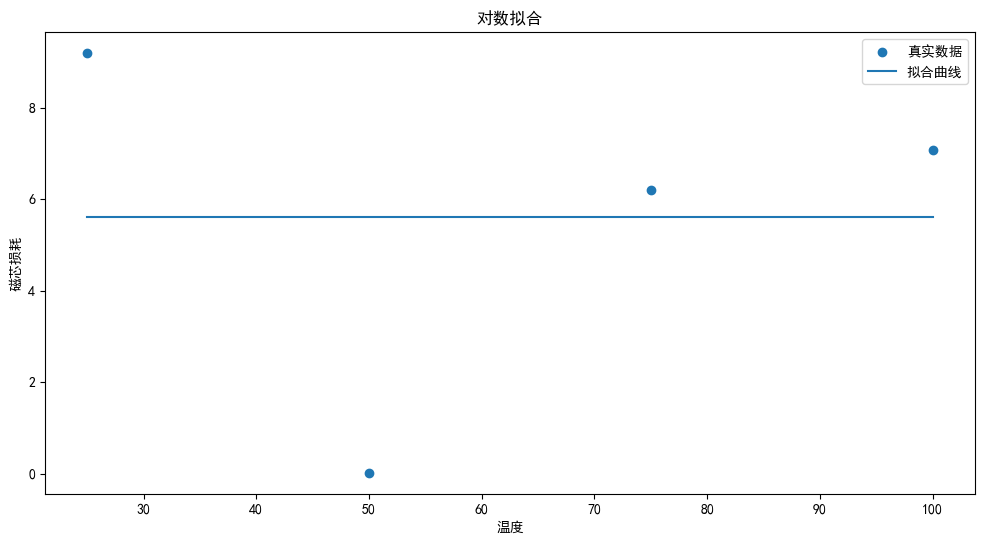

In [179]:
def func(T, k, a, b):
    return (np.log(T) - b) / a

def fit_func(x, k, a, b):
    return func(x, k, a, b)

initial_guess = [1, 1, 1]

T = np.array([25, 50, 75, 100])
y = np.array([9.2, 0.01, 6.2, 7.07])

popt, pcov = curve_fit(fit_func, T, y, p0=initial_guess)
a, b = popt[1], popt[2]
print(f"拟合结果：a={a}, b={b}")

# 绘制拟合结果
plt.figure(figsize=(12, 6))
plt.scatter(T, y, label='真实数据')
T_fit = np.linspace(T.min(), T.max(), 100)
y_fit = func(T_fit, *popt)
plt.plot(T_fit, y_fit, label='拟合曲线')
plt.xlabel('温度')
plt.ylabel('磁芯损耗')
plt.title('对数拟合')
plt.legend()
plt.show()